<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Assignment 3</strong></h1>

Comprehensive data preparation, exploration, visualization, feature engineering, and classification modeling for a case study: Predict house price range in Hanoi 2019 and 2020 periods.


<b> Group: 10</b>
+ Student Name: Nguyen Dang Huynh Chau (s3777214)</b>
+ Student Name: Tran Ngoc Anh Thu (s3879312)</b>
+ Student Name: Ho Le Minh Thach (s3879312)</b>
+ Student Name: Do Hoang Duc (s3788345)</b>
+ Lecturer: Vo Ngoc Yen Nhi </b>

Having played a vital role in the human-being life, housing is one of the greatest considerations and its price has been researched carefully in millions of studies by using machine learning. Although, this is not the rare topic, it is still necessary to construct a machine learning model in order to not only predict an accurate housing price but also have the user-friendliness for the users to have the most optimised and effective way to investigate the housing price for improving the living standard.

# Hypothesis forming:


<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Table of Content</strong></h1>

### 1. [General Requirement](#1)

1.1 [Overview](#1.1)

1.2 [Required  Libraries](#1.2)

<br>

### 2. [Data Preparation & Data exploration (EDA)](#2)

2.1 [Data Preparation](#2.1)

2.2 [Check data types & Make the data homogeneous](#2.2)

2.3 [Missing Values](#2.3)
+ [Guess the missingness type](#2.3.1)
+ [Drop missing values pairwise for df and validation set by deleting their rows](#2.3.2)
+ [Drop missing values listwise for all the datasets by deleting their columns](#2.3.3)
+ [Interpolate() - Nearest Value imputation for Weather_Timestamp](#2.3.4)
+ [Median & Frequent Categorical Imputation for Weather Continuous features](#2.3.5)
+ [Impute Median and Mode for the rest- assume that there is random order of missing values](#2.3.6)

2.4 [Shorten and Simplify categories](#2.4)
+ [2.4.1 Time-series columns - break them down into hour, minute, and weekday](#2.4.1)
+ [2.4.2 Shorten & Simplify the Wind Direction](#2.4.2)

2.5 [Typos](#2.5)
+ [2.5.1 Check for typos in the dataset](#2.5.1)
+ [2.5.2 Extra-whitespaces](#2.5.2)
+ [2.5.3 Lower-case all values in each column](#2.5.3)

2.6 [Sanity checks](#2.6)
+ [2.6.1 Check duplication](#2.6.1)
+ [2.6.2 Impossible values](#2.6.2)

2.7 [Extra exploration and visualization](#2.7)
+ [2.7.1 Medium distance by severity bar chart](#2.7.1)
+ [2.7.2 Top 10 states having the most accidents bar chart](#2.7.2)
+ [2.7.3 Longtitude and Latitude Scatterplot](#2.7.3)
+ [2.7.4 Most frequent POI Attributes of an accident with severity bar chart](#2.7.4)

<br>

### 3. [Feature Engineering](#3)
3.1 [Data Correlation - Quantify the association of features and accidents](#3.1)

3.2 [Gaussian Distributions - Box Cox OR Log Transformation of skewed features](#3.2)

3.3 [Assumptions of Regression](#3.3)

3.4 [Multicollinearity of Features](#3.4)

3.5 [Drop multicollinearity features and high p-value](#3.5)

3.6 [Encoding](#3.6)

3.7 [Check OLS stats model - Multivariate - Interpretation of the Model Coefficient, the P-value, the R-squared](#3.7)

3.8 [df - Test - Validation Sets](#3.8)

3.9 [Feature scaling](#3.9)

<br>

### 4. [Model dfing](#4)

<br>

### 5. [Model comparison and export](#5)

<br>

### 6. [Summary](#6)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Data Preparation - THACH </strong></h1>

<a id="1.1"></a>
# 1.1 Importing Necessary Libraries and datasets

In [199]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno

# work with data in tabular representation
from datetime import time

import pandas as pd
# round the data in the correlation matrix
import numpy as np
# module for regular expression
import re

# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy.stats import skew  # for some statistics
import matplotlib.style as style
from xgboost import sklearn
import statsmodels.api as sm

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# run a python file
%run function.py

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

In [200]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)

Numpy version:  1.19.5
Pandas version:  1.3.4


# Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [201]:
%time
# import test dataset
df = pd.read_csv('Data/VN_housing_dataset.csv', delimiter=',', skipinitialspace = True)
df.drop('Unnamed: 0', 1, inplace=True)
df.head(3)

Wall time: 0 ns


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


## Rename column
***
Since these columns are in Vietnamese so translate into English will be more straightforward in later process. We will also analyse the column meaning:
- The 'Ngày' will be the date which will contain all the day, month, year value
- The 'Địa chỉ' will be the address which contains the street, ward, district, city
- The 'Quận' is district
- The 'Huyện' is not suppose to be the ward. However, the content they have is actually the ward
- The 'Loại hình nhà ở' is a type of house which depends on the location such as villa, house in the main street, house in the alley, or townhouse.
- The 'Giấy tờ pháp lý' is the legal document either already have, or on waiting, or others documents.
- The 'Số tầng' is the number of floor
- The 'Số phòng ngủ' is the number of bedroom
- The 'Diện tích' is the area unit in meter square
- The 'Dài' is the length unit in meter
- The 'Rộng' is the width unit in meter
- The 'Giá/m2' is the price in million VND per meter square

In [202]:
df.columns = [
    'Date', 'Address', 'District',
    'Ward', 'House_type', 'Legal_documents', 
    'No_floor', 'No_bedroom', 'Area', 'Length', 'Width', 'Price']
df.head(3)

,Date,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Data Cleaning</strong></h1>

## About This Dataset
***

Now let's go through the features and describe a little. There is a couple of different type of variables, They are...
***
**Categorical:**
- **Nominal**
    > - **Address**
    > - **District**
    > - **Ward**
    > - **Housing_type**
    > - **Legal_documents**
- **Ordinal**
    > - **No_room**
    > - **No_floor**
***
**Numeric:**
- **Continuous**
  >  - **Area**
  >  - **Length**
  >  - **Width**  
  >  - **Price**
***
**Date/time:**
- **Date**(Nominal variable)

## Data types
***

### Change data types

In [203]:
# Cast date columns to the Date data type
df['Date'] = pd.to_datetime(df['Date'])

# Show days of the week into a separated column
df['Day_Of_Week'] = df['Date'].dt.day_name()

# Cast Date columns to the string data type in order to slice data later
df['Date'] = df['Date'].astype(str)

# slice the column to get the year and month in a new column
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

df['Month'] = get_months(df, 'Date')
df['Year'] = get_years(df, 'Date')

# Drop original columns
df = df.drop(['Date'], axis=1)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²",Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²",Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²,Wednesday,08,2020


In [204]:
df['Area'] = df['Area'].replace('\sm²', '', regex=True)
df['Length'] = df['Length'].replace('\sm', '', regex=True)
df['Width'] = df['Width'].replace('\sm', '', regex=True)
df['Price'] = df['Price'].replace('\striệu/m²', '', regex=True).replace(',', '.', regex=True)

# df is the DataFrame, and column_list is a list of columns as strings
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
    return df.dtypes

coerce_df_columns_to_numeric(df, ['Area','Length', 'Width', 'Price'])

Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object

### Remove prefix & Typo check

In [205]:
df['District'] = df['District'].replace('Quận\s', '', regex=True)
# print out list of District types
print(f'NUMBER OF CATEGORIES: {df.District.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.District.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['Cầu Giấy' 'Thanh Xuân' 'Hai Bà Trưng' 'Tây Hồ' 'Đống Đa' 'Hà Đông'
 'Huyện Thanh Trì' 'Hoàng Mai' 'Long Biên' 'Hoàn Kiếm' 'Nam Từ Liêm'
 'Ba Đình' 'Huyện Hoài Đức' 'Bắc Từ Liêm' 'Huyện Đan Phượng'
 'Huyện Thanh Oai' 'Huyện Sóc Sơn' 'Huyện Gia Lâm' 'Huyện Chương Mỹ'
 'Huyện Đông Anh' 'Huyện Thường Tín' 'Thị xã Sơn Tây' 'Huyện Mê Linh'
 'Huyện Thạch Thất' 'Huyện Quốc Oai' 'Huyện Phúc Thọ' 'Huyện Phú Xuyên'
 'Huyện Ba Vì' nan 'Huyện Mỹ Đức']





In [206]:
df['Ward'] = df['Ward'].replace('Phường\s', '', regex=True)
df['Ward'] = df['Ward'].replace('Xã\s', '', regex=True)

# print out list of Ward types
print(f'NUMBER OF CATEGORIES: {df.Ward.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Ward.unique()}\n\n\n')

NUMBER OF CATEGORIES: 305; 

UNIQUE NAMES OF THE CATEGORIES ['Nghĩa Đô' 'Kim Giang' 'Minh Khai' 'Thụy Khuê' 'Yên Hoà' 'Trung Liệt'
 'Đống Mác' 'Xuân La' 'Văn Quán' 'Thị trấn Văn Điển' 'Định Công' 'Bồ Đề'
 'Quang Trung' 'Thanh Lương' 'Khương Trung' 'Phúc Tân' 'Gia Thụy'
 'Khương Đình' 'Phương Canh' 'Tương Mai' 'La Khê' 'Mễ Trì' 'Khương Mai'
 'Láng Hạ' 'Quan Hoa' 'Tây Mỗ' 'Ngọc Khánh' 'Đại Mỗ' 'Tả Thanh Oai'
 'Mỹ Đình 1' 'Tam Hiệp' 'Cống Vị' 'Bách Khoa' 'Vĩnh Phúc' 'Kim Chung'
 'Đại Kim' 'Mai Động' 'Trung Tự' 'Kiến Hưng' 'Trúc Bạch' 'Cổ Nhuế 1'
 'Đức Giang' 'Mỹ Đình 2' 'Bưởi' 'Ô Chợ Dừa' 'Long Biên' 'Hoàng Văn Thụ'
 'Mai Dịch' 'Nhân Chính' 'Vạn Phúc' 'Ngọc Hà' 'Lĩnh Nam' 'Xuân Đỉnh'
 'Phú Đô' 'Liễu Giai' 'Thị trấn Phùng' 'Kim Liên' 'Phúc Diễn' 'Kim Mã'
 'Trung Phụng' 'Tân Mai' 'Cầu Diễn' 'Ngã Tư Sở' 'Trung Văn' 'Thượng Đình'
 'Hoàng Liệt' 'Thịnh Liệt' 'Quốc Tử Giám' 'Khâm Thiên' 'Trương Định'
 'Phú Diễn' 'Thạch Bàn' 'Ngọc Thụy' 'Cầu Dền' 'Phú Lương' 'Bạch Đằng'
 'Phú La' 'Hà Cầu' 'Láng T

In [207]:
# print out list of House_type types
print(f'NUMBER OF CATEGORIES: {df.House_type.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.House_type.unique()}\n\n\n')

NUMBER OF CATEGORIES: 4; 

UNIQUE NAMES OF THE CATEGORIES ['Nhà ngõ, hẻm' 'Nhà mặt phố, mặt tiền' 'Nhà biệt thự' 'Nhà phố liền kề'
 nan]





In [208]:
# print out list of Legal_documents types
print(f'NUMBER OF CATEGORIES: {df.Legal_documents.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Legal_documents.unique()}\n\n\n')

NUMBER OF CATEGORIES: 3; 

UNIQUE NAMES OF THE CATEGORIES ['Đã có sổ' nan 'Đang chờ sổ' 'Giấy tờ khác']





In [209]:
# print out list of No_floor types
print(f'NUMBER OF CATEGORIES: {df.No_floor.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_floor.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['4' nan '6' '5' '7' '2' '3' '8' '1' '9' '50' '38' '35' '10'
 'Nhiều hơn 10' '45' '33' '42' '25' '73' '12' '65' '55' '30' '14' '40'
 '52' '54' '32' '29']





In [210]:
df['No_bedroom'] = df['No_bedroom'].replace('\sphòng', '', regex=True)

# print out list of No_bedroom types
print(f'NUMBER OF CATEGORIES: {df.No_bedroom.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_bedroom.unique()}\n\n\n')

NUMBER OF CATEGORIES: 11; 

UNIQUE NAMES OF THE CATEGORIES ['5' '3' '4' '6' 'nhiều hơn 10' '8' '2' '7' '9' '1' '10' nan]





### Translate the content

In [211]:
# Translate the content from Vietnamese into English

df['House_type'].replace('Nhà ngõ, hẻm', 'byroad', inplace=True)
df['House_type'].replace('Nhà mặt phố, mặt tiền', 'street_house', inplace=True)
df['House_type'].replace('Nhà biệt thự', 'villa', inplace=True)
df['House_type'].replace('Nhà phố liền kề', 'townhouse', inplace=True)

df['Legal_documents'].replace('Đã có sổ', 'available', inplace=True)
df['Legal_documents'].replace('Đang chờ sổ', 'waiting', inplace=True)
df['Legal_documents'].replace('Giấy tờ khác', 'others', inplace=True)

df['No_floor'].replace('Nhiều hơn 10', 'greater_than_10', inplace=True)

df['No_bedroom'].replace('nhiều hơn 10', 'greater_than_10', inplace=True)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Cầu Giấy,Nghĩa Đô,byroad,available,4,5,46.0,NaN,NaN,86.96,Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Kim Giang,street_house,NaN,NaN,3,37.0,NaN,NaN,116.22,Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,Minh Khai,byroad,available,4,4,40.0,10.0,4.0,65.00,Wednesday,08,2020


### Upper Case the content

In [212]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
df = df.applymap(lambda s: s.upper() if type(s) == str else s)
df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"ĐƯỜNG HOÀNG QUỐC VIỆT, PHƯỜNG NGHĨA ĐÔ, QUẬN C...",CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,NaN,NaN,86.96,WEDNESDAY,08,2020
1,"ĐƯỜNG KIM GIANG, PHƯỜNG KIM GIANG, QUẬN THANH ...",THANH XUÂN,KIM GIANG,STREET_HOUSE,NaN,NaN,3,37.0,NaN,NaN,116.22,WEDNESDAY,08,2020
2,"PHỐ MINH KHAI, PHƯỜNG MINH KHAI, QUẬN HAI BÀ T...",HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.00,WEDNESDAY,08,2020


## Missing values
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also the negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

Missing values in the dataframe in descending: 
                  Total  Percent
Length           62670    75.97
Width            47052    57.03
No_floor         46098    55.88
Legal_documents  28887    35.02
Price              871     1.06
Address             48     0.06
Ward                48     0.06
No_bedroom          39     0.05
House_type          32     0.04
District             2      NaN
Area                 2      NaN
Day_Of_Week          1      NaN


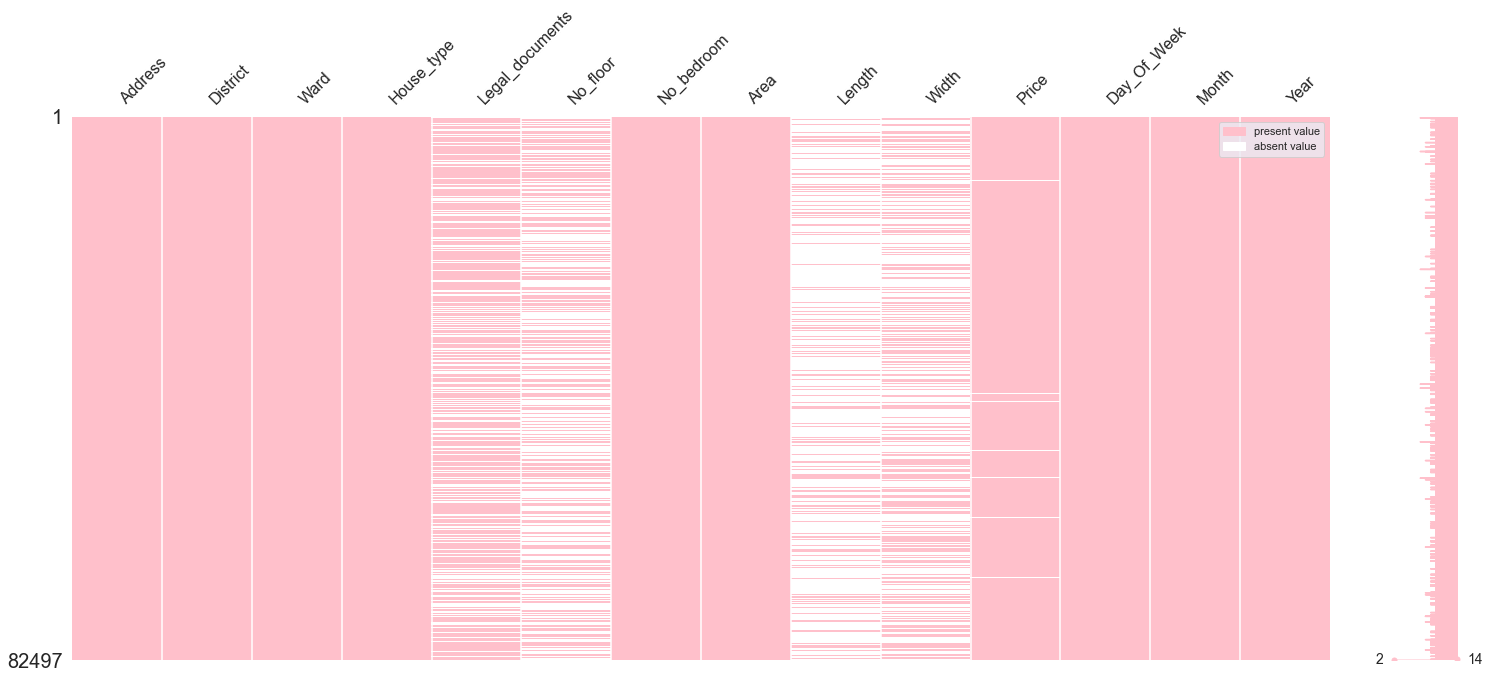

In [213]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION

<hr>

+ Only a few missing values of the dataframes suggests that it MIGHT be missing completely at random due to a small number of missing values.

District             2      NaN
Area                 2      NaN
Date                 1      NaN
day_of_week          1      NaN


#### I'm going to delete any missing column that IS COMPLETELY AT RANDOM (MCAR) AND has small number of missing values.
#### From the graph, I can see a strong correlation the strong correlation between `Legal_documents`, `No_floor`, `Length` and `Width`.


<hr>

In [214]:
# Pairwise delete the rows
df.dropna(subset=['District', 'Area', 'Day_Of_Week', 'Month', 'Year'], how='any', inplace=True)

<br><br>
<a id="2.2"></a>
# Task 2.2: Check data types & Make the data homogeneous
The dtypes that pandas uses are: `float`, `int`, `bool`, `datetime`, `timedelta`, `category` and `object`. I modify data types in my DataFrames to help me transform them into more meaningful metrics

+ Cast pandas objects to a specified dtype (string)¶
+ Numeric data should have for example the same number of digits after the point.

In [215]:
print("The shape of the data BEFORE CONVERT is (row, column):", str(df.shape))
print("The data types BEFORE CONVERT are:", df.dtypes, "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df[['Month', 'Year']] = df[['Month', 'Year']].astype('int32', errors='ignore')


print("The shape of the data AFTER CONVERT is (row, column):", str(df.shape))
print("The data types AFTER CONVERT are:", df.dtypes, "\n\n")

The shape of the data BEFORE CONVERT is (row, column): (82494, 14)
The data types BEFORE CONVERT are: Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object 


The shape of the data AFTER CONVERT is (row, column): (82494, 14)
The data types AFTER CONVERT are: Address             string
District            string
Ward                string
House_type          string
Legal_documents     string
No_floor            string
No_bedroom          string
Area               Float64
Length             Float64
Width              Float64
Price              Float64
Day_Of_Week         string
Month                int32
Year                 int32
dtype: object 




In [216]:
print("The dataframe BEFORE dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))

# If all values are NA, drop that row or column.
df.dropna(how='all', inplace=True)

# display missing values in descending
print("The dataframe AFTER dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

The dataframe BEFORE dropped has 82494 rows and 14 columns
The dataframe AFTER dropped has 82494 rows and 14 columns
Missing values in the dataframe in descending: 
                  Total  Percent
Length           62668    75.97
Width            47051    57.04
No_floor         46096    55.88
Legal_documents  28886    35.02
Price              869     1.05
Address             47     0.06
Ward                46     0.06
No_bedroom          38     0.05
House_type          31     0.04


In [217]:
df['Day_Of_Week'].value_counts(dropna=False)

TUESDAY      14310
MONDAY       13888
WEDNESDAY    12459
THURSDAY     12425
FRIDAY       12170
SATURDAY     10669
SUNDAY        6573
Name: Day_Of_Week, dtype: Int64

In [218]:
df['Month'].value_counts(dropna=False)

7     44807
6     29791
8      7542
5       196
4        59
3        51
2        36
10        6
12        3
11        2
9         1
Name: Month, dtype: int64

In [219]:
df['Year'].value_counts(dropna=False)

2020    82476
2019       18
Name: Year, dtype: int64

In [220]:
df['Legal_documents'].value_counts(dropna=False)

AVAILABLE    52912
NaN          28886
WAITING        356
OTHERS         340
Name: Legal_documents, dtype: Int64

In [221]:
df['Legal_documents'].fillna("OTHERS", inplace=True)

In [222]:
df['House_type'].value_counts(dropna=False)
df['House_type'].fillna("BYROAD", inplace=True)

In [223]:
df[['Address', 'Ward', 'District']][df['District'].isna()]

,Address,Ward,District


In [224]:
df[['Address', 'Ward', 'District']][df['Ward'].isna()]

,Address,Ward,District
174,<NA>,<NA>,NAM TỪ LIÊM
324,"ĐƯỜNG AN DƯƠNG VƯƠNG, QUẬN TÂY HỒ, HÀ NỘI",<NA>,TÂY HỒ
741,"CẦU KHÊ TANG, QUẬN HÀ ĐÔNG, HÀ NỘI",<NA>,HÀ ĐÔNG
4558,<NA>,<NA>,HUYỆN HOÀI ĐỨC
5282,<NA>,<NA>,LONG BIÊN
5295,<NA>,<NA>,LONG BIÊN
7169,<NA>,<NA>,HUYỆN THANH TRÌ
8584,<NA>,<NA>,THANH XUÂN
12595,<NA>,<NA>,HÀ ĐÔNG
14548,<NA>,<NA>,HÀ ĐÔNG


As you can see the address is not specific location. Hence, there is no specific ward because a street can have multiple ward. Thus, we should only fill the missing value with None.

In [225]:
df['Ward'].fillna("None", inplace=True)
df['Address'].fillna("None", inplace=True)
df['No_floor'].value_counts(dropna=False)

NaN                46096
5                  15769
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
10                    36
45                     8
GREATER_THAN_10        7
35                     6
38                     2
12                     2
50                     2
30                     1
32                     1
54                     1
52                     1
40                     1
14                     1
65                     1
55                     1
73                     1
25                     1
42                     1
33                     1
29                     1
Name: No_floor, dtype: Int64

In [226]:
mode = df['No_floor'].mode()[0]
df['No_floor'].fillna(mode, inplace=True)

In [227]:
# define a function to feed into the lambda
def No_floor_count(value):
    if value == '1' or value == '2' or value == '3' \
            or value == '4' or value == '5' or value == '6' \
            or value == '7' or value == '8' or value == '9' or value == '10':
        return value
    else:
        return 'GREATER_THAN_10'

df['No_floor'] = df['No_floor'].map(lambda n: No_floor_count(n))
df['No_floor'].value_counts(dropna=False)

5                  61865
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
GREATER_THAN_10       40
10                    36
Name: No_floor, dtype: int64

In [228]:
df['No_bedroom'].value_counts(dropna=False)

4                  29069
3                  27162
5                   7924
2                   7330
6                   6461
1                   1388
8                    938
GREATER_THAN_10      869
7                    678
10                   354
9                    283
NaN                   38
Name: No_bedroom, dtype: Int64

In [229]:
mode = df['No_bedroom'].mode()[0]
df['No_bedroom'].fillna(mode, inplace=True)

In [230]:
#Different Location have different housing area
df['Area'] = df.groupby('District')['Area'].apply(lambda x: x.fillna(x.median()))
df['Price'] = df.groupby('District')['Price'].apply(lambda x: x.fillna(x.median()))

# df['Number_of_room'] = df.groupby('Area')['Number_of_room'].apply(lambda x: x.fillna(x.median()))
df['Length'] = df.groupby('Area')['Length'].apply(lambda x: x.fillna(x.median()))
df['Length'].fillna(df['Length'].mean(), inplace=True)
df['Width'] = df.groupby('Area')['Width'].apply(lambda x: x.fillna(x.median()))
df['Width'].fillna(df['Width'].mean(), inplace=True)

In [231]:
df['Street'] = df['Address'].str.split(',', expand=True)[0]
df['Street'] = df['Street'].replace('ĐƯỜNG\s', '', regex=True)
df['Street'] = df['Street'].replace('PHỐ\s', '', regex=True)

# print out list of Street types
print(f'NUMBER OF CATEGORIES: {df.Street.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Street.unique()}\n\n\n')

NUMBER OF CATEGORIES: 4434; 

UNIQUE NAMES OF THE CATEGORIES <StringArray>
[                   'HOÀNG QUỐC VIỆT',                          'KIM GIANG',
                          'MINH KHAI',                           'VÕNG THỊ',
                            'YÊN HÒA',                            'TÂY SƠN',
                             'LÒ ĐÚC',                            'XUÂN LA',
                               '19/5',                           'TỰU LIỆT',
 ...
                       'TRẦN CAO VÂN',                             '68/114',
                              'TÚ MƠ',                            'NGÕ 127',
                          '15/22/269',                   'SỐ 9 NGÕ 211/229',
          'KHU B ĐẠI HỌC MỎ ĐỊA CHẤT',              'LÊ TRỌNG TẤN HOÀI ĐỨC',
               'LẠC LONG QUÂN TÂY HỒ', 'SỐ 7 ĐẠI LỘ THĂNG LONG NAM TỪ LIÊM']
Length: 4434, dtype: string





In [232]:
df.drop('Address', 1, inplace=True)

In [233]:
df.isna().sum()

District           0
Ward               0
House_type         0
Legal_documents    0
No_floor           0
No_bedroom         0
Area               0
Length             0
Width              0
Price              0
Day_Of_Week        0
Month              0
Year               0
Street             0
dtype: int64

## Extra-whitespaces

In [234]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

whitespace_remover(df)

### ----------> OBSERVATION
<hr>

> There is no typo left

<hr>

<br><br>
<a id="2.6"></a>
# 2.6 Sanity checks
Design and run a small test-suite, consisting of a series of sanity checks to test for the presence of **impossible values** and **outliers** for each attribute.
<a id="2.6.1"></a>
### 2.6.1 Check duplication
+ Use the pandas function `.drop_duplicates()` to remove copied rows from a DataFrame

+ Could not drop duplicated in TEST since I'll use it to compete in Kaggle learboard

In [235]:
# df
print("Number of rows before drop of duplicates  in df:", len(df.index))
print("Number of duplicated records in df: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in df:", len(df.index), "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df.info()

Number of rows before drop of duplicates  in df: 82494
Number of duplicated records in df:  1367
Number of rows after drop of duplicates in df: 81127 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81127 entries, 0 to 82495
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District         81127 non-null  string 
 1   Ward             81127 non-null  string 
 2   House_type       81127 non-null  string 
 3   Legal_documents  81127 non-null  string 
 4   No_floor         81127 non-null  string 
 5   No_bedroom       81127 non-null  string 
 6   Area             81127 non-null  Float64
 7   Length           81127 non-null  Float64
 8   Width            81127 non-null  Float64
 9   Price            81127 non-null  Float64
 10  Day_Of_Week      81127 non-null  string 
 11  Month            81127 non-null  Int32  
 12  Year             81127 non-null  Int32  
 13  Street           81127 non-null  string 
dt

In [236]:
df.columns

Index(['District', 'Ward', 'House_type', 'Legal_documents', 'No_floor',
       'No_bedroom', 'Area', 'Length', 'Width', 'Price', 'Day_Of_Week',
       'Month', 'Year', 'Street'],
      dtype='object')

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Data exploration (EDA)</strong></h1>

# Descriptive statistics for Central Tendency Using Pandas

In [237]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,81127.0,51.544077,474.620979,1.0,34.00,40.0,50.00,111411.0
Length,81127.0,29.946635,3198.145360,1.0,9.00,10.0,12.00,900000.0
Width,81127.0,18.903275,2050.064440,1.0,4.00,4.0,4.30,423432.0
Price,81127.0,102.457406,63.264701,1.0,73.33,90.0,110.29,998.0
Month,81127.0,6.721042,0.642697,2.0,6.00,7.0,7.00,12.0
Year,81127.0,2019.999778,0.014894,2019.0,2020.00,2020.0,2020.00,2020.0


<AxesSubplot:>

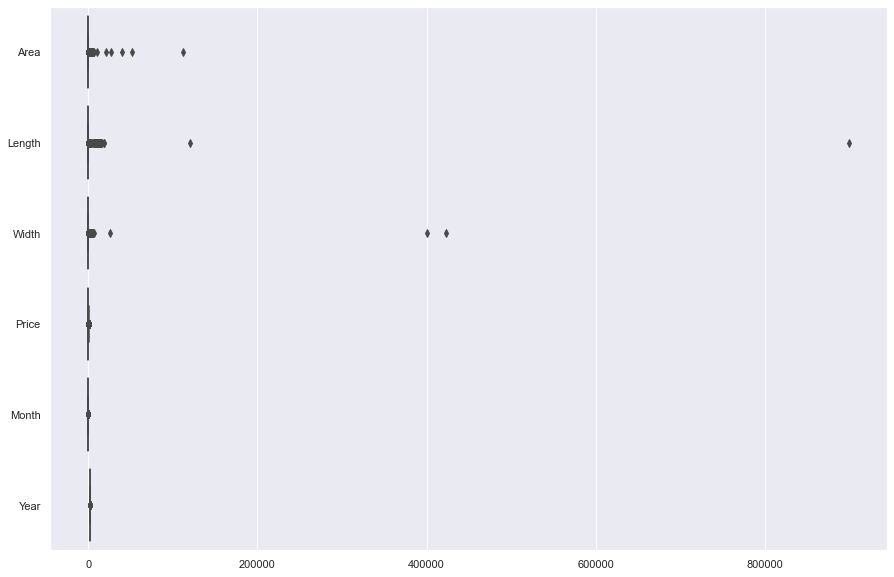

In [238]:
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

### ---------> OBSERVATION
> For all numerical columns, I see some extreme outlier values in `Area`, `Length`, and `Width`. Let's investigate them further to see if they are real outliers or not using statistical techniques.

### Interquartile Range

In [239]:
q1_Price = df['Price'].quantile(.25)
q3_Price = df['Price'].quantile(.75)
iqr_Price = q3_Price - q1_Price

print("q1_Price:", q1_Price, "\n")
print("q3_Price:", q3_Price, "\n")
print("iqr_Price:", iqr_Price)

q1_Price: 73.33 

q3_Price: 110.29 

iqr_Price: 36.96000000000001


(0.0, 400.0)

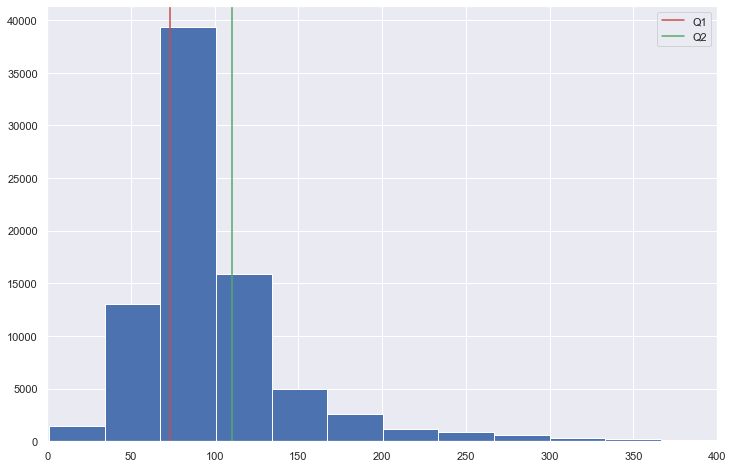

In [240]:
plt.figure(figsize=(12, 8))

df['Price'].hist(bins=30)

plt.axvline(q1_Price, color='r', label='Q1')
plt.axvline(q3_Price, color='g', label='Q2')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,400)

### Standard Deviation

In [241]:
Price_mean = df['Price'].mean()

Price_std = df['Price'].std()

print("Mean Price:", Price_mean, "\n")
print("Standard deviation Price:", Price_std, "\n")

Mean Price: 102.45740573421917 

Standard deviation Price: 63.26470050814368 



(0.0, 450.0)

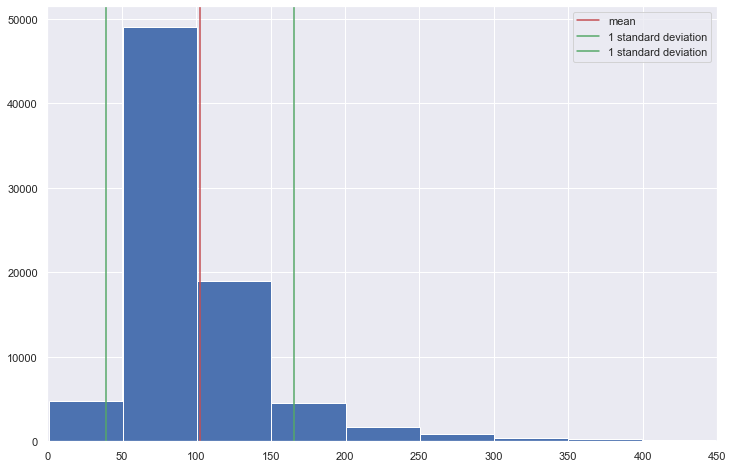

In [242]:
plt.figure(figsize=(12, 8))

df['Price'].hist(bins=20)

plt.axvline(Price_mean, color='r', label='mean')

plt.axvline(Price_mean - Price_std, color='g', label='1 standard deviation')
plt.axvline(Price_mean + Price_std, color='g', label='1 standard deviation')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,450)

# Descriptive statistics for Variability Using Pandas

In [243]:
Price_mean = df['Price'].mean()

Price_median = df['Price'].median()

Price_mode = df['Price'].mode().values[0]

(0.0, 550.0)

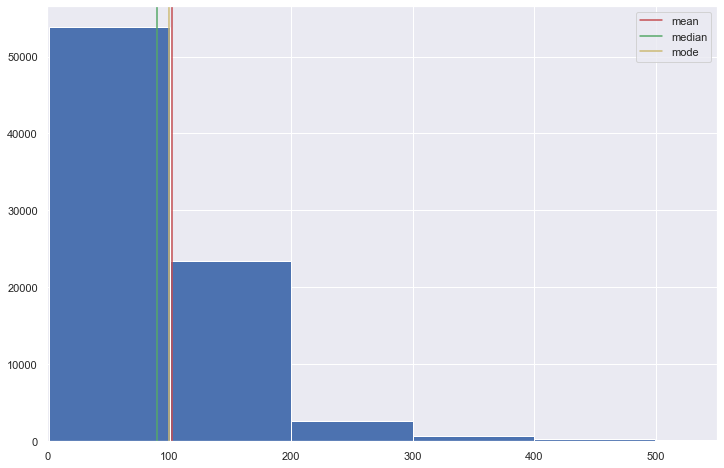

In [244]:
plt.figure(figsize=(12, 8))

df['Price'].hist()

plt.axvline(Price_mean, color='r', label='mean')
plt.axvline(Price_median, color='g', label='median')
plt.axvline(Price_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### ---------> OBSERVATION
> The mean larger than the median indicates that the data is skewed to the right.

In [245]:
House_type_counts = {}

for p in df['House_type']:
    if p not in House_type_counts:
        House_type_counts[p] = 1
    else:
        House_type_counts[p] += 1

House_type_counts

{'BYROAD': 61314, 'STREET_HOUSE': 16985, 'VILLA': 952, 'TOWNHOUSE': 1876}

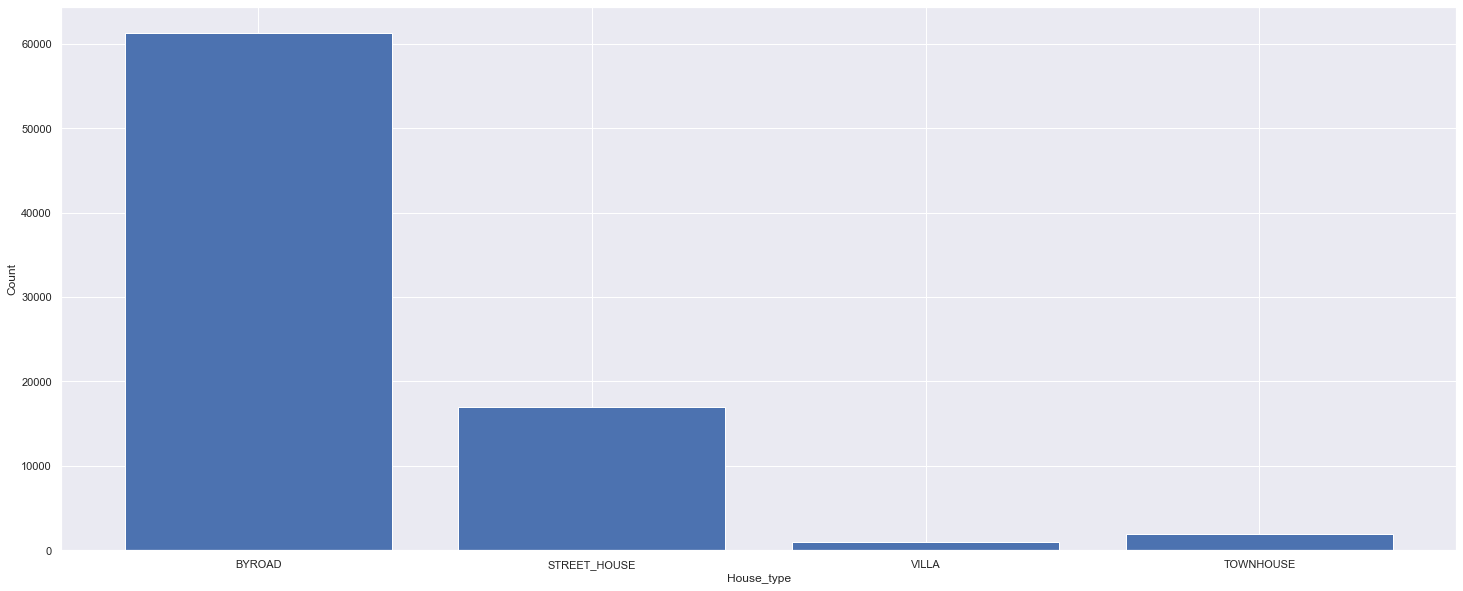

In [246]:
plt.figure(figsize=(25, 10))

x_range = range(len(House_type_counts))

plt.bar(x_range, list(House_type_counts.values()), align='center')
plt.xticks(x_range, list(House_type_counts.keys()))

plt.xlabel('House_type')
plt.ylabel('Count')

plt.show()

### ---------> OBSERVATION
> BYROAD has the highest count of houses

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Checking for impossiple values - DUC</strong></h1>

In [247]:
# Rules and policies for building houses in Hanoi is taken from Havaco VN website.

# houses in cities have area of 40 m2 will only have at most 5 floors. Therefore, we have to code filter the dataframe
# to exclude those who are not satisfy the condition.

# About townhouse policy:

#Townhouse can't be build more than 6 floors. Townhouse in alley smaller than 6m can't be more than 4 floors.
#Land for building with area from 30m2 to 40m2, house can be build no more than 4 floors and 1 attic.
#Land for building with area more than 50m2, houser can be build at most 6 floors.

#About street_house policy:

#Land for building with area from 15m2 to less than 30m2, house can be build at most 4 floors and 1 attic.
#Land for building with area from 30m2 to less than 40m2 , hosue can be build at most 4 floors and 1 attic.
#Land for building with area more than 50m2, house can be build at most 6 floors.

#Citation:
#Công ty TNHH Nội thất Havaco Việt Nam. 2021. Quy định chiều cao xây dựng nhà ở Hà Nội. [online] Available at: <https://havacovn.com/goc-tu-van/quy-dinh-chieu-cao-xay-dung-nha-o-ha-noi> [Accessed 26 December 2021].

In [248]:
df

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year,Street
0,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,11.0,4.0,86.96,WEDNESDAY,8,2020,HOÀNG QUỐC VIỆT
1,THANH XUÂN,KIM GIANG,STREET_HOUSE,OTHERS,5,3,37.0,10.0,4.0,116.22,WEDNESDAY,8,2020,KIM GIANG
2,HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.0,WEDNESDAY,8,2020,MINH KHAI
3,TÂY HỒ,THỤY KHUÊ,BYROAD,AVAILABLE,5,6,51.0,12.75,4.0,100.0,WEDNESDAY,8,2020,VÕNG THỊ
4,THANH XUÂN,KIM GIANG,BYROAD,OTHERS,5,4,36.0,9.0,4.0,86.11,WEDNESDAY,8,2020,KIM GIANG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82491,BẮC TỪ LIÊM,PHÚC DIỄN,TOWNHOUSE,OTHERS,5,3,38.0,10.0,4.0,81.58,FRIDAY,8,2019,HỒ TÙNG MẬU
82492,CẦU GIẤY,QUAN HOA,STREET_HOUSE,OTHERS,5,3,50.0,11.0,4.0,292.0,WEDNESDAY,8,2019,TRẦN QUỐC HOÀN
82493,CẦU GIẤY,QUAN HOA,STREET_HOUSE,AVAILABLE,5,4,41.0,10.0,4.0,341.46,WEDNESDAY,8,2019,NGUYỄN KHÁNH TOÀN
82494,CẦU GIẤY,QUAN HOA,BYROAD,AVAILABLE,5,4,60.0,12.0,5.0,101.67,MONDAY,8,2019,QUAN HOA


In [249]:
#1st policy for town houses:
df = df[df.No_floor != 'GREATER_THAN_10']

In [250]:
#1st policy for town houses:
index_townHouses = df[ (df['No_floor'].astype(int) > 6) ].index

# drop these given row
df.drop(index_townHouses, inplace = True)

#2nd policy for town houses with area from 30ms to less than 40m2:
index_townHouses2 = df[ (df['Area'].astype(int) >= 30) & (df['Area'].astype(int) < 40) & (df['No_floor'].astype(int) > 4)].index

df.drop(index_townHouses2, inplace = True)

#3rd policy for town houses with area more than 50m2:
index_townHouses3 = df[ (df['Area'].astype(int) > 50) ].index

df.drop(index_townHouses3, inplace = True)

df

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year,Street
0,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,11.0,4.0,86.96,WEDNESDAY,8,2020,HOÀNG QUỐC VIỆT
2,HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.0,WEDNESDAY,8,2020,MINH KHAI
5,CẦU GIẤY,YÊN HOÀ,BYROAD,AVAILABLE,5,GREATER_THAN_10,46.0,12.1,3.8,104.35,WEDNESDAY,8,2020,YÊN HÒA
9,HÀ ĐÔNG,VĂN QUÁN,BYROAD,AVAILABLE,4,3,41.0,10.0,3.5,64.63,WEDNESDAY,8,2020,19/5
13,HÀ ĐÔNG,QUANG TRUNG,BYROAD,OTHERS,5,5,50.0,11.0,5.0,86.0,WEDNESDAY,8,2020,QUANG TRUNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82488,CẦU GIẤY,MAI DỊCH,TOWNHOUSE,AVAILABLE,5,4,50.0,11.0,4.0,98.0,TUESDAY,10,2019,DOÃN KẾ THIỆN
82489,CẦU GIẤY,DỊCH VỌNG HẬU,BYROAD,AVAILABLE,5,3,40.0,10.0,4.0,77.5,THURSDAY,9,2019,XUÂN THỦY
82492,CẦU GIẤY,QUAN HOA,STREET_HOUSE,OTHERS,5,3,50.0,11.0,4.0,292.0,WEDNESDAY,8,2019,TRẦN QUỐC HOÀN
82493,CẦU GIẤY,QUAN HOA,STREET_HOUSE,AVAILABLE,5,4,41.0,10.0,4.0,341.46,WEDNESDAY,8,2019,NGUYỄN KHÁNH TOÀN


In [251]:
#1st policy for street houses:
index_streetHouses = df[( df['Area'].astype(int) >= 15) & (df['Area'].astype(int) < 30) & (df['No_floor'].astype(int) > 4)].index

# drop these given row
df.drop(index_streetHouses, inplace = True)

#2nd policy for street houses:
index_streetHouses2 = df[ (df['Area'].astype(int) >= 30) & (df['Area'].astype(int) < 40) & (df['No_floor'].astype(int) > 4)].index

df.drop(index_streetHouses2, inplace = True)

#3rd policy for street houses:
index_streetHouses3 = df[( df['Area'].astype(int) > 50) & (df['No_floor'].astype(int) > 6)].index

df.drop(index_streetHouses3, inplace = True)

df

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year,Street
0,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,11.0,4.0,86.96,WEDNESDAY,8,2020,HOÀNG QUỐC VIỆT
2,HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.0,WEDNESDAY,8,2020,MINH KHAI
5,CẦU GIẤY,YÊN HOÀ,BYROAD,AVAILABLE,5,GREATER_THAN_10,46.0,12.1,3.8,104.35,WEDNESDAY,8,2020,YÊN HÒA
9,HÀ ĐÔNG,VĂN QUÁN,BYROAD,AVAILABLE,4,3,41.0,10.0,3.5,64.63,WEDNESDAY,8,2020,19/5
13,HÀ ĐÔNG,QUANG TRUNG,BYROAD,OTHERS,5,5,50.0,11.0,5.0,86.0,WEDNESDAY,8,2020,QUANG TRUNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82488,CẦU GIẤY,MAI DỊCH,TOWNHOUSE,AVAILABLE,5,4,50.0,11.0,4.0,98.0,TUESDAY,10,2019,DOÃN KẾ THIỆN
82489,CẦU GIẤY,DỊCH VỌNG HẬU,BYROAD,AVAILABLE,5,3,40.0,10.0,4.0,77.5,THURSDAY,9,2019,XUÂN THỦY
82492,CẦU GIẤY,QUAN HOA,STREET_HOUSE,OTHERS,5,3,50.0,11.0,4.0,292.0,WEDNESDAY,8,2019,TRẦN QUỐC HOÀN
82493,CẦU GIẤY,QUAN HOA,STREET_HOUSE,AVAILABLE,5,4,41.0,10.0,4.0,341.46,WEDNESDAY,8,2019,NGUYỄN KHÁNH TOÀN


### Bivariate Analysis

<AxesSubplot:xlabel='Length', ylabel='Price'>

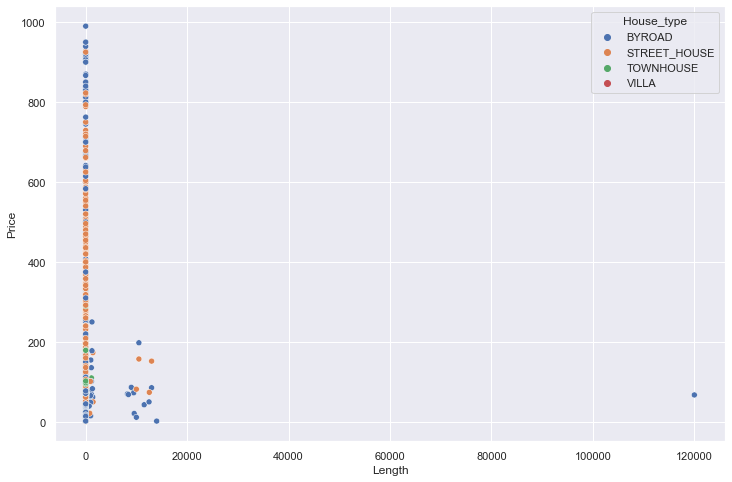

In [252]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x = "Length", y = "Price", hue='House_type', data=df)

### ---------> OBSERVATION
> There is 1 extreme outlier in the dataset for the `Length` attribute that > 8000000 meter.

### Multivariate data analysis

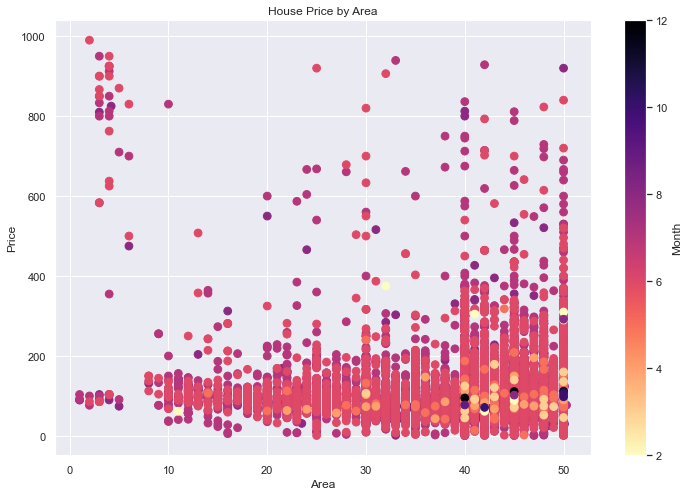

In [253]:
fig, ax = plt.subplots()

df.plot(x='Area', y='Price',
                     kind='scatter', s=60, c='Month',
                     cmap='magma_r', title='House Price by Area',
                     figsize=(12, 8), ax=ax)

plt.show()

### ---------> OBSERVATION
> There are outliers from the range of 20000 to 20000 meter square for the Area column

# Date visualization

### Number of houses for Day Of Week by Types

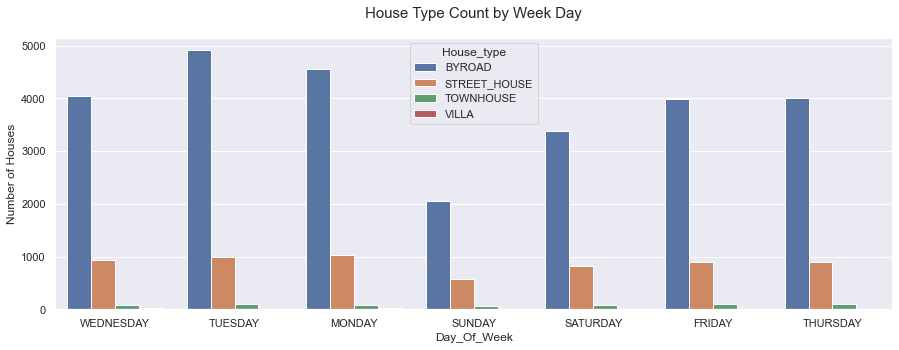

In [254]:
# define the figure size
plt.figure(figsize=(15, 5))

# create count plot for severity for each year
sns.countplot(x='Day_Of_Week', hue='House_type', data=df)

# set the ticks, labels and title
plt.title('House Type Count by Week Day', size=15, y=1.05)
plt.ylabel("Number of Houses")

# show plot
plt.show()

### ---------> OBSERVATION
> The most houses were recorded on Tuesday, and the BYROAD house is the most popular house type.

### Number of houses for Month by Types

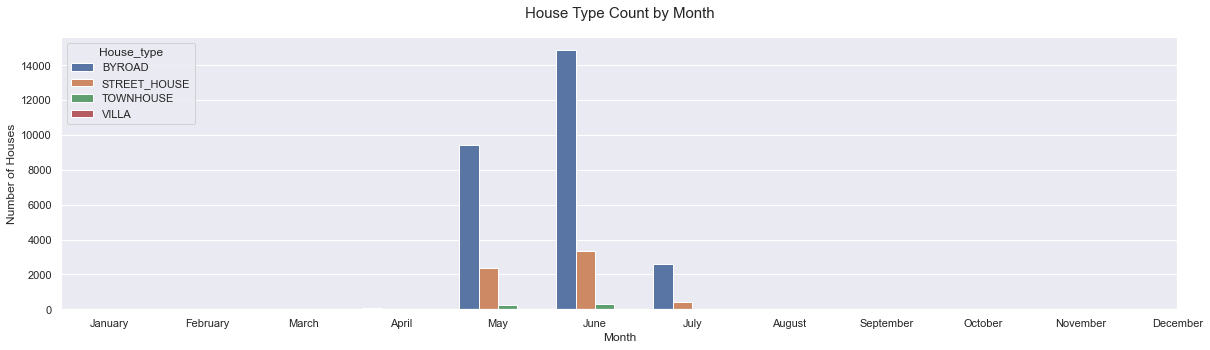

In [255]:
# import calendar for getting the month and week names
import calendar

# define the plot size
plt.figure(figsize=(20, 5))

# create count plot for severity for each month
sns.countplot(x='Month', hue='House_type', data=df)

# set itle, labels and ticks
plt.title('House Type Count by Month', size=15, y=1.05)
plt.ylabel("Number of Houses")
plt.xticks(np.arange(0, 12, 1), calendar.month_name[1:13])

#show plot
plt.show()

### ---------> OBSERVATION
> Surprisingly, significantly higher houses were recorded from May to July, and the BYROAD house is the most popular house type.

### Number Houses for Year By Types

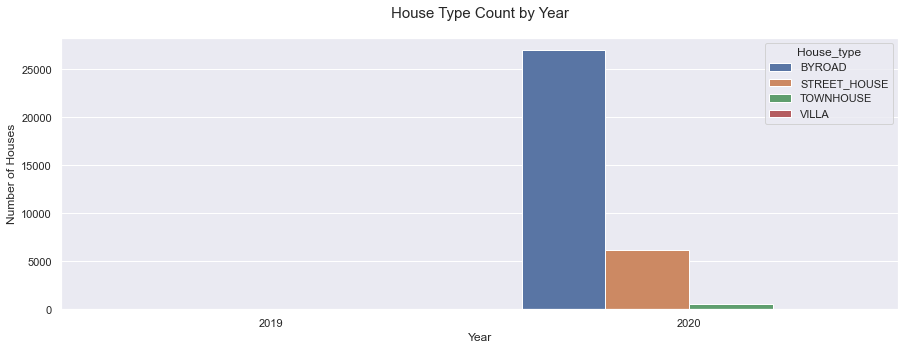

In [256]:
# define the figure size
plt.figure(figsize=(15, 5))

# create count plot for severity for each year
sns.countplot(x='Year', hue='House_type', data=df)

# set the ticks, labels and title
plt.title('House Type Count by Year', size=15, y=1.05)
plt.ylabel("Number of Houses")

# show plot
plt.show()

### ---------> OBSERVATION
> Significantly higher houses were recorded in 2020. The BYROAD house is the most popular and the VILLA is the least popular house type might due to their expensive price.

# FacetGrid
* We first initialise a FacetGrid object with a dataframe
* Specify the row, column and hue parameters
* Every unique value of the categorical variable is then used to create a facet along the specified axis.
* A plotting function is applied to each subset by using a map function


(0.0, 10000.0)

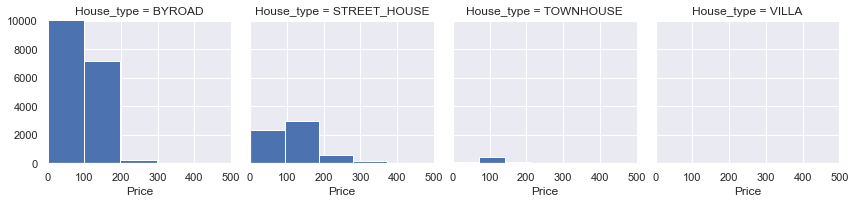

In [257]:
g=sns.FacetGrid(df,col="House_type")
g.map(plt.hist,"Price")

plt.xlim(0,500)
plt.ylim(0,10000)

### ---------> OBSERVATION

> We have called the plt.hist function to plot a histogram for the count and total price for the different types of house types in Hanoi.

> It is clear that the STREET house type has the highest price. It has the maximum interaction in the form of all types. The histogram shows that the price between 0 and 300 has the largest area, implying highest price.

> All houses have more likely to have prices in the range of 50 to 300.

> The houses with a STREET house type are more popular than those with VILLA, BYROAD, or TOWNHOUSE types.

#### We now pass multiple variables to make a relational Scatterplot.

#### Adding a legend to show what the colors stand for
We have added "alpha=0.7" to reduce the opacity of the points in the scatterplot.
It is 1 by default. Making it closer to 0 makes it more transparent.

(0.0, 5000.0)

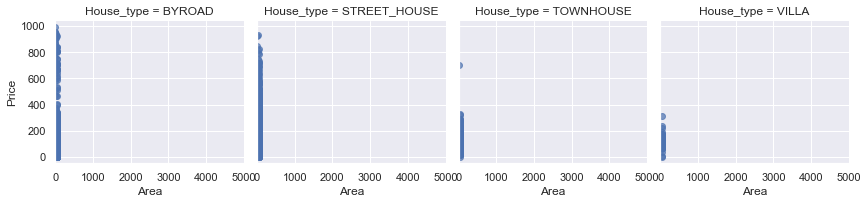

In [258]:
g=sns.FacetGrid(df, col="House_type")
g.map(plt.scatter,"Area", "Price", alpha=0.7)

g.add_legend()

plt.xlim(0,5000)
# plt.ylim(0,10000)

### ---------> OBSERVATION
> In the range of 0 to 5000 meter square, the STREET house type has the highest price and the BYROAD has larger area than others

(0.0, 1000.0)

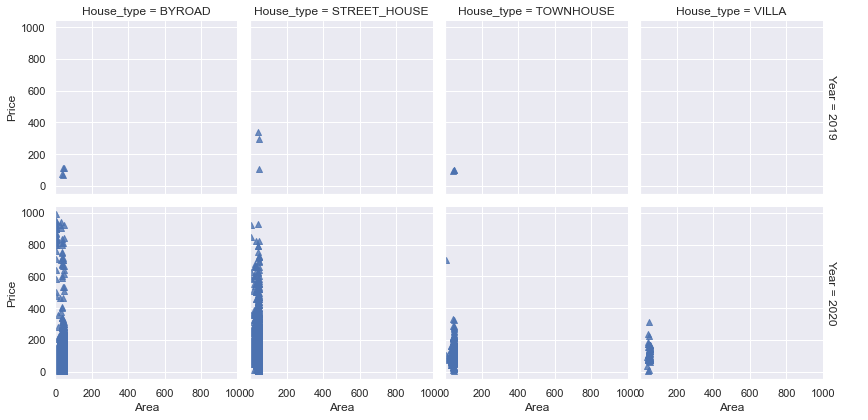

In [259]:
#Creating a dictionary for markers and passing it to hue_kws variable
h={0:"pink",1:"blue"}
i={"marker":["^","v"]}

g=sns.FacetGrid(df,row="Year",
                col="House_type",
                # hue="Area",
                margin_titles=True,
                palette=h,
                hue_kws=i)

g.map(sns.regplot,"Area","Price",fit_reg=False)

g.add_legend()
plt.xlim(0,1000)

### ---------> OBSERVATION
> In the range of 0 to 1000 meter square, the STREET and BYROAD house types have the highest price and the larger area than others in 2020
> In 2019, a significant portion of the houses were recorded in the range of 0 to 400 meter square.

> We see that the points are plotted with the specified markers. As we have also specified colours, we see that the markers are in accordance with the passed in color scheme



# Bar plot,

*We simply pass in an ordered list to the corresponding parameter, for eg, row_order, hue_order, etc.* <br>
By default, the variables are ordered in ascending order if they are numbers, and in the order of appearance otherwise.

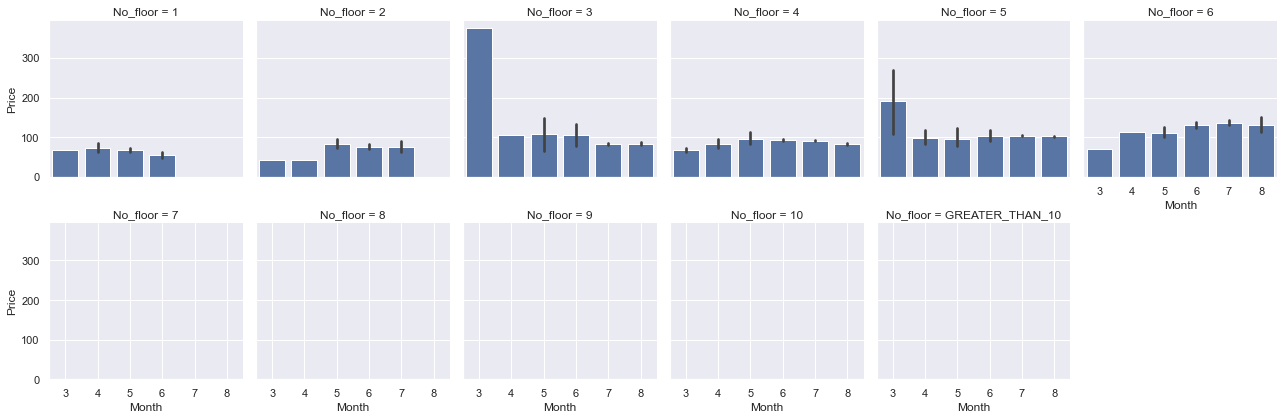

In [260]:
g=sns.FacetGrid(df,col="No_floor", col_order=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "GREATER_THAN_10"], col_wrap=6)

g.map(sns.barplot,"Month","Price")

### We have to zoom in into each graph if we want to understand this. Do we have a way to make them of readable size and position them better?

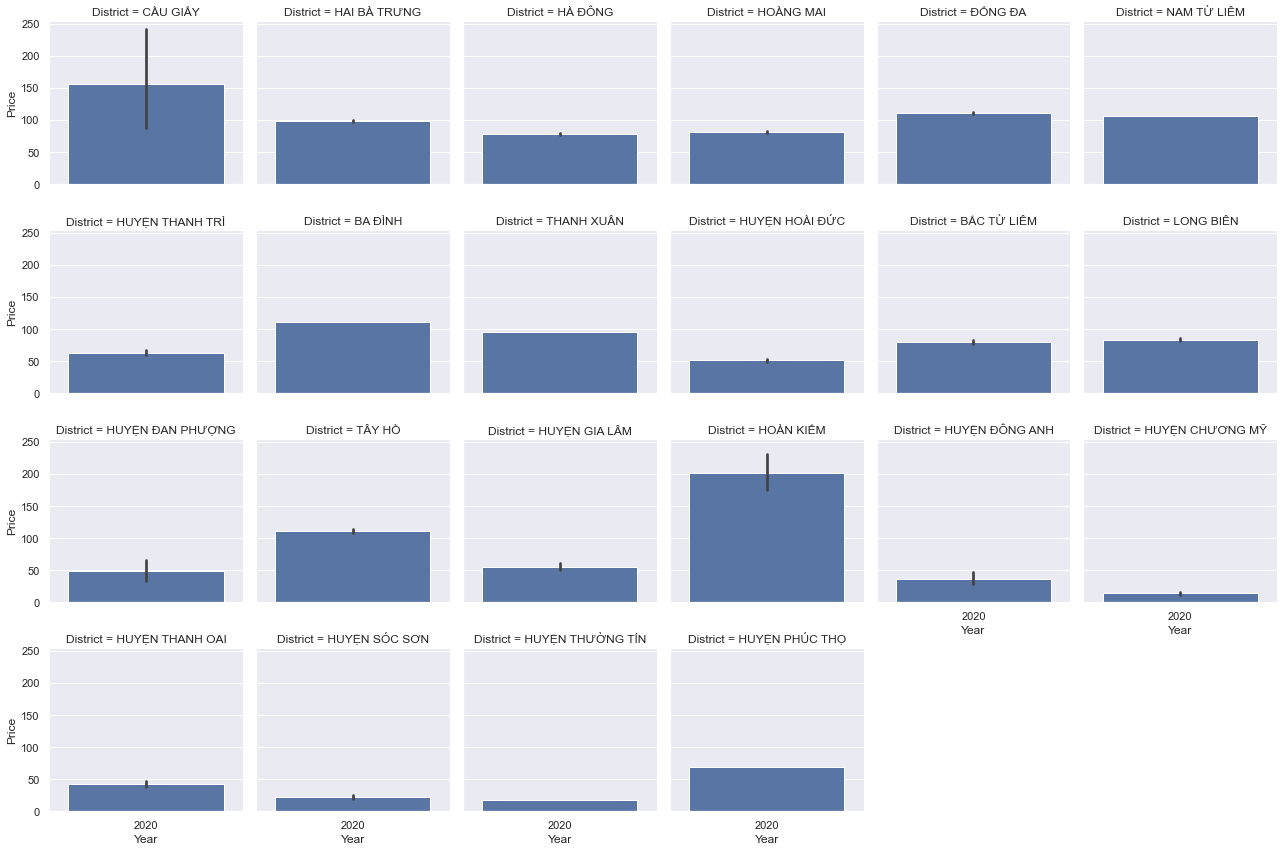

In [261]:
g=sns.FacetGrid(df, col="District", col_wrap=6)
g.map(sns.barplot,"Year","Price")

### ---------> OBSERVATION
> Hoan Kiem district has the highest house price in the year 2020.

In [262]:
# The most common Ward

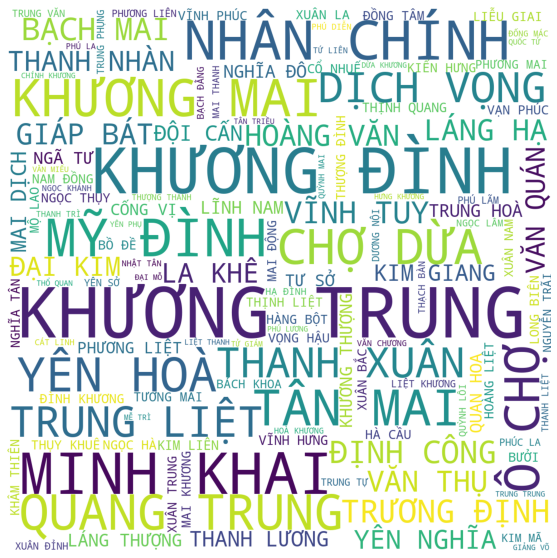

In [263]:
from wordcloud import WordCloud

"""
Word Cloud¶:
get the most common words in the address field to later simplify them.
"""

text = str(list(df['Ward'])).replace(',', '').replace(';', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 122).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### ---------> OBSERVATION
> Khuong Truong and Khuong Dinh are the most common wards in the dataset.

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Part 3. Visualization and Feature Relations - CHAU</strong></h1>

***
Before we dive into finding relations between independent variables and our dependent variable(Price_per_metersquare), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:**

- Same housing type, the plot in urban districts in Hanoi should not be lower than the suburban districts.
- Villa house should have the higest amount of money
- Surburban should have the more optimised option for the consumers


Now, let's see how the features are related to each other by creating some visualizations.
****
##  3a. Some domain knowledge:
***
1. **Housing_type**:
> In the same street, the lane house should be cheeper than the Frontage or Villa house, but in some cases they have more advantages since the rules for building them is not as restricted as the Frontage or Villa house.

2. **Number of Floor**:
- **The Land lot with an area of 30m2 to less than 40m2** : With a facade width greater than 3m, a depth of more than 5m compared to the construction boundary, it is allowed to build no more than 4 floors + 1 tum (total height < 16m).
- **The Land lot with an area of 40m2 - 50m2** : If the width of the facade is over 3m and less than 8m, the depth compared to the construction limit is greater than 5m, it is allowed to build no more than 5 floors + 1 tum, or have a heat resistant roof (total height of the house < 20m).
- **The Land Lot with an area of over 50m2**: The width of the facade is greater than 8m, the depth is greater than 5m compared to the construction boundary or the construction works on both sides of the road in the restricted development planning area, the 6-storey house may be built.

3. **Legal_documents**:
In Vietnam, the House ownership certificate is used for transfer of land use right, however, it is still possible in transfering in some cases
- Having a Certificate, except for the case specified in Clause 3, Article 186 and the case of inheritance specified in Clause 1, Article 168 of this Law.

- Undisputed land.

- The land use right is not distrained to secure judgment enforcement.

- During the land use term.

However, it is **NOT SAFE** to use these plots since the land users can just only use temporarily the land in its current state until the State recovers the land, and the condition is extremely overwhelmed and restricted.

4. **Area, Length and Width** :
According to The latest report on the conditions for the separation of plots in Hanoi in 2021, the plot having area less than 30m^2 can still be sold but it has to follow the condition:

According to Clause 1, Article 188 of the 2013 Land Law, when transferring land use rights (which people often call land purchase and sale), the land user must meet the following conditions:

- Having Certificate, except 02 cases;

- Undisputed land;

- The land use right is not distrained to secure judgment enforcement;

- During the land use period.

Moreover in order to build a house, the plot must be calculated the density for the plot with the formula

Density (%) = 90 + (85-90) / (100-75) * ( <b> Area </b> - 75)
***
For example, your lot area is 83m2. Your house is in the inner city. The construction density is calculated as follows:

Density (%) = 90 + (85-90) / (100-75) * (83-75) = 88.4%

Thus, the land area is 83m2, the area allowed to build: 83 x 88.4% = 73.37m2. The rest is not built as a setback and atrium (leave space) to ensure density.
***

5. **Price_per_metersquare** :
- Arcoding to Tuoitre, the Price_per_metersquare is in the range from 495000 VND/m2 to 87.920.000 VND/m2 is safe and ideal for consume
- Having same housing type, the plot in urban districts in Hanoi should not be lower than the suburban districts
***

***So that the safety condition for the customers is:**
- Plot has number of floor is less than 8. (*)
- Already had registration book.
- The Area is higher than 30m^2. (*)
- Price is in the range from 495000 VND/m2 to 87920000 VND/m2.
- Same housing type, the plot in urban districts in Hanoi should not be lower than the suburban districts.
- In the same street, the lane house should be cheaper than the Frontage or Villa house.

(*): Must go together otherwise the buildings have high probability to fall.

***Reference:***
- The latest report on the conditions for the separation of plots in Hanoi in 2021:
> https://danviet.vn/dieu-kien-tach-thua-tai-ha-noi-nam-2021-moi-nhat-2021032906255103.htm
- Height Limitation:
> https://noithatmyhouse.com/quy-dinh-chieu-cao-xay-dung-nha-o/
- Legal Document:
> https://luatvietnam.vn/dat-dai-nha-o/su-dung-dat-khong-co-so-do-567-27503-article.html
- Report on limited area for buy:
> https://luatvietnam.vn/dat-dai-nha-o/dat-nho-hon-dien-tich-toi-thieu-co-duoc-phep-mua-ban-567-22530-article.html
- Price of housing plot in Hanoi:
> https://tuoitre.vn/gia-dat-o-tai-ha-noi-cao-nhat-187-92-trieu-met-vuong-20191226102403571.htm
- Price of housing plot in Hanoi::
> https://laodong.vn/bat-dong-san/dat-hon-vang-nhung-tuyen-pho-giua-long-ha-noi-790770.ldo

## 3b. Add New Features For Visualising

In [264]:
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
def plot_box(dataset, x, y, xlabel, ylabel, title, subtitle, color, title_position, subtitle_position, order=None):
    ax = sns.boxplot(data = dataset, y = y, x = x, order = order,
                 linewidth = 1.2, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9))

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)
    ax.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = ax.transAxes)
    plt.show()

## Unsafety Example
***
This is just one of the unsafety example. In this example, the Area is less than 30m^2 and the height is higher than 8 floors.

In [265]:
options = ['GREATER_THAN_10', '9', '10']

unsafety = df[(df['Area'] < 30) & (df['No_floor'].isin(options))]
unsafety

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year,Street


## New "isUrban" Column
***
The target is to find the location for the best optimised plots. Hence, at first the dataset is separted in to urban or suburbans, then compare them. In case, if the urban is more optimised then explore in which districts in urban is the most ideal option

In [266]:
def isUrban(district):
    urban = ['ĐỐNG ĐA', 'THANH XUÂN', 'HOÀNG MAI',  'HAI BÀ TRƯNG',
             'HÀ ĐÔNG', 'CẦU GIÂY', 'BA ĐÌNH', 'LONG BIÊN',
             'NAM TỪ LIÊM', 'TÂY HỒ', 'BẮC TỪ LIÊM', 'HOÀN KIẾM']
    inUrban = 'URBAN'
    for i in range (0, 11):
        if(district == urban[i]): inUrban = 'SUBURBAN'
    return inUrban

df['isUrban'] = df['District'].apply(isUrban)

## New "isSafe" Column
***

In [267]:
def isSafe(Legal_documents, Number_of_floor, Construction_density, Price_per_metersquare):
    floor = ['GREATER_THAN_10', '8', '7', '9', '10']
    larger_than_8 = False
    for i in range (0, len(floor)):
        if(larger_than_8 == floor[i]): larger_than_8 = True
    if(Legal_documents == 'Already had registration book' or (larger_than_8 == True) and
       (Construction_density > 30) and (Price_per_metersquare > 495000 and Price_per_metersquare < 87920000)):
        return True
    else:
        return False

df['isSafe'] = df.apply(lambda x: isSafe(x['Legal_documents'], x['No_floor'], x['Area'], x['Price']), axis=1)

## 3c. Plotting Features
***
***Main Target***
- Determine best time for buying plots.
- Location (urban, suburban, and district) best to buy plots.

## Time: Determine best time for buying plots

### House Price Count by Month

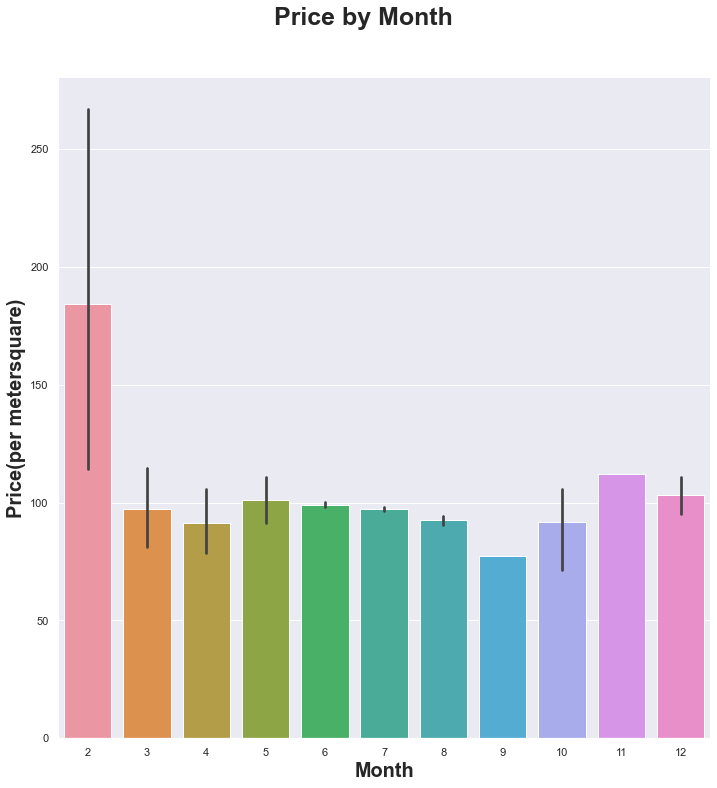

In [268]:
plot = sns.catplot(data=df, kind="bar", x="Month", y="Price", height = 10)

plot.fig.suptitle("Price by Month", fontsize=25, fontdict={"weight": "bold"}, y=1.08, fontweight = 'bold')
plot.set_xlabels("Month", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Price(per metersquare)", fontsize = 20, fontweight = 'bold')

## OBSERVATION:
Overall, The price house in Febuary has the highest price, while in the September has the lowest price. Moreover, the price in the Febuary is **approximately double** of the price in September. What is the factor results in high price? Select the high price month and analyse with **House_type, No_floor, No_bedroom, area, isSafe**.

### What factors affects the price?

In [269]:
df.describe()

,Area,Length,Width,Price,Month,Year
count,33786.000000,33786.000000,33786.000000,33786.000000,33786.000000,33786.000000
mean,41.143791,19.624462,8.221873,97.566932,6.724856,2019.999704
std,7.334292,694.776291,112.493662,54.341973,0.637125,0.017202
min,1.000000,1.000000,1.000000,1.000000,2.000000,2019.000000
25%,40.000000,10.000000,4.000000,72.500000,6.000000,2020.000000
50%,42.000000,10.000000,4.000000,87.780000,7.000000,2020.000000
75%,46.000000,11.000000,4.000000,107.500000,7.000000,2020.000000
max,50.300000,120000.000000,5500.000000,990.000000,12.000000,2020.000000


**Select the Febuary**

In [270]:
highPriceMonth = df[(df['Month'] == 2)]

In [271]:
highPriceMonth.describe()

,Area,Length,Width,Price,Month,Year
count,9.000000,9.000000,9.000000,9.000000,9.0,9.0
mean,39.777778,9.555556,3.888889,184.510000,2.0,2020.0
std,12.060035,2.297341,0.333333,131.045527,0.0,0.0
min,11.000000,4.000000,3.000000,61.820000,2.0,2020.0
25%,41.000000,10.000000,4.000000,71.430000,2.0,2020.0
50%,42.000000,10.000000,4.000000,96.670000,2.0,2020.0
75%,45.000000,11.000000,4.000000,304.880000,2.0,2020.0
max,50.000000,11.000000,4.000000,375.000000,2.0,2020.0


**Select the September**

In [272]:
lowPriceMonth = df[(df['Month'] == 9)]
lowPriceMonth

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year,Street,isUrban,isSafe
82489,CẦU GIẤY,DỊCH VỌNG HẬU,BYROAD,AVAILABLE,5,3,40.0,10.0,4.0,77.5,THURSDAY,9,2019,XUÂN THỦY,URBAN,False


**Febuary**
Max Area, Length, Width is higher than 75% of the dataset

**September**
Max Area, Length, Width is just equal to the 50 percent of the dataset


> **So Max Area, Length, Width are the considerable factors on the price**


### The Price of the plot in the Febuary in each area.

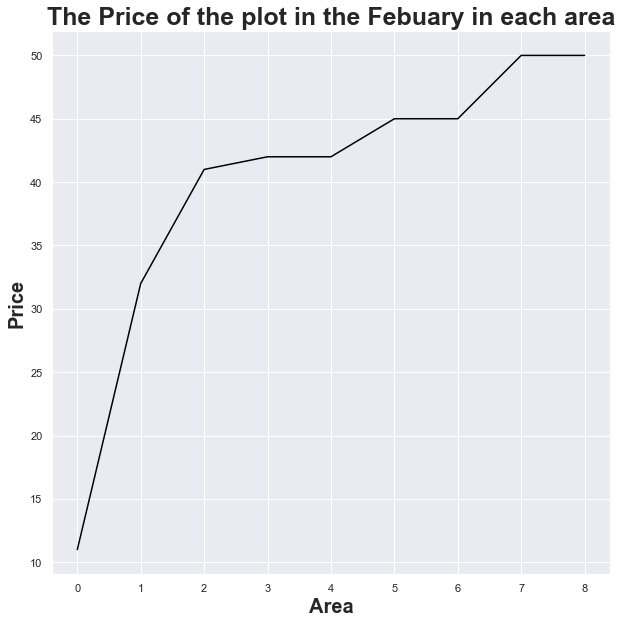

In [273]:
highPriceMonth_sort = highPriceMonth.sort_values('Area').reset_index(drop=True)
highPriceMonth_sort['Area'].plot(kind='line', title="Area", color="black")

# depicting the visualization
plt.xlabel('Area', fontsize = 20, fontweight = 'bold')
plt.ylabel('Price', fontsize = 20, fontweight = 'bold')

# displaying the title
plt.title("The Price of the plot in the Febuary in each area", fontsize = 25, fontweight = 'bold')

plt.show()

### The Price of each plot in each type of legal documents with different number of room and floor in Febuary

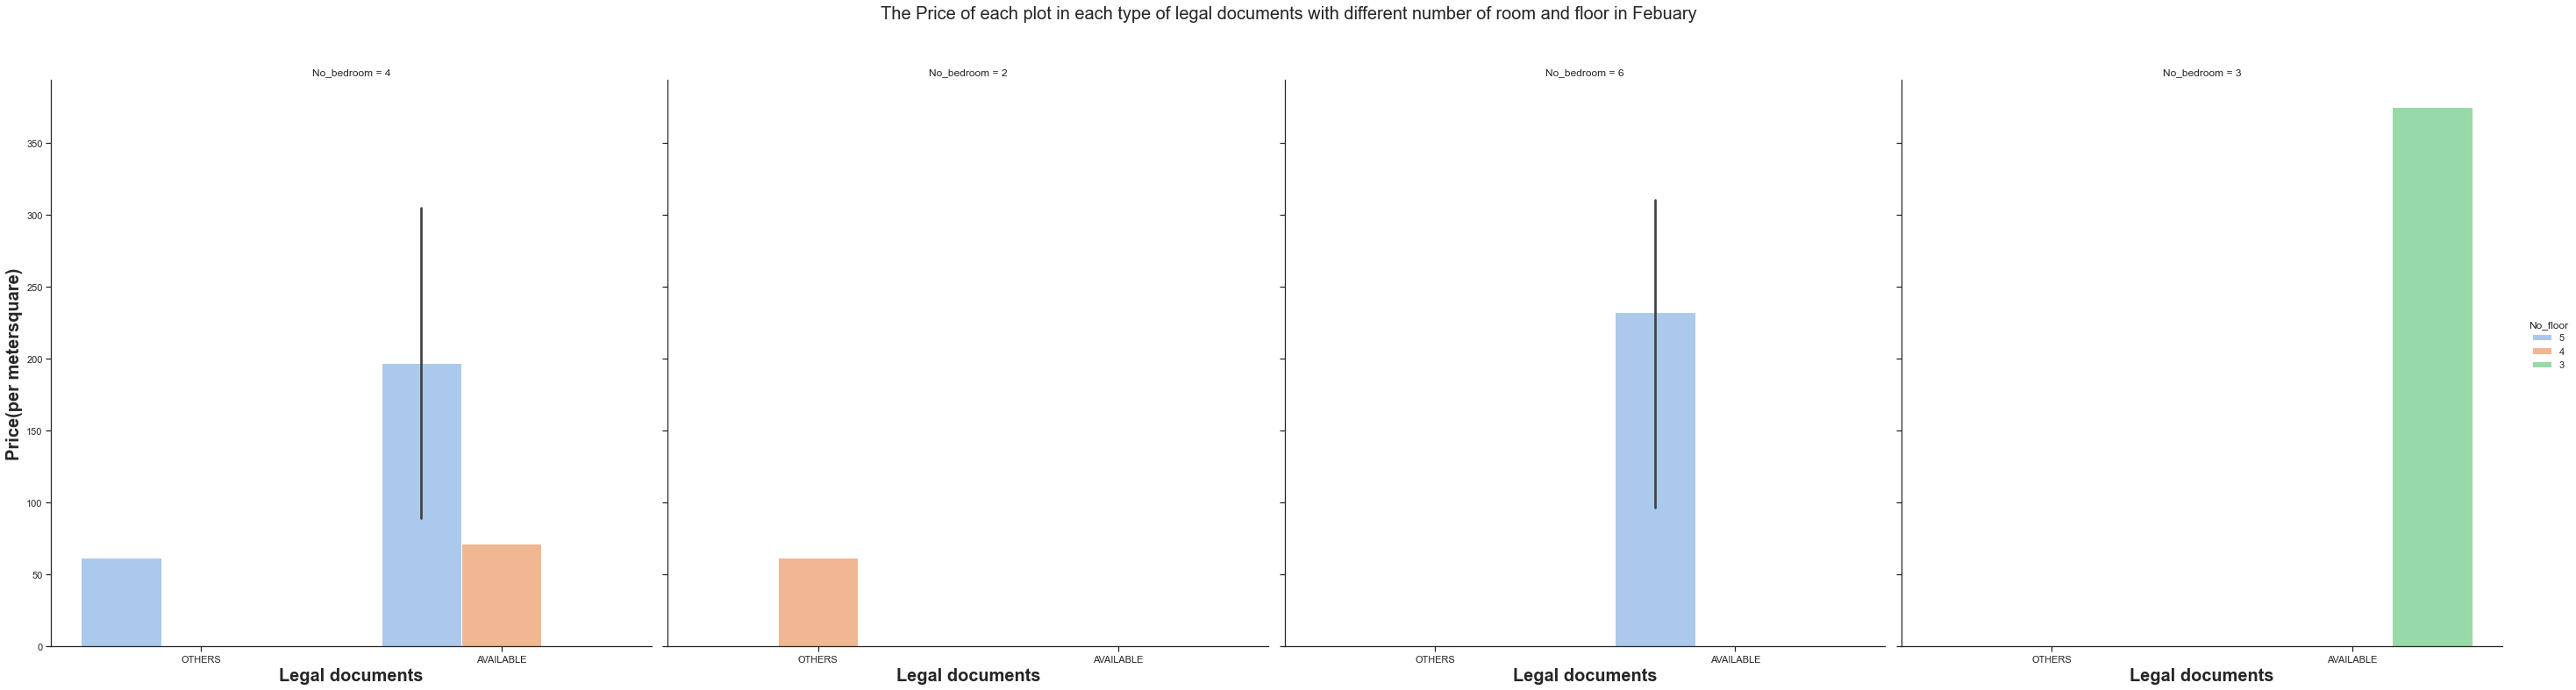

In [274]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=highPriceMonth, kind="bar", x="Legal_documents", y="Price", hue="No_floor", col = "No_bedroom", height = 10)
plot.fig.suptitle("The Price of each plot in each type of legal documents with different number of room and floor in Febuary", fontsize=20,
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Legal documents", fontsize = 20, fontweight = 'bold')
plot.set_ylabels("Price(per metersquare)", fontsize = 20, fontweight = 'bold')

## OBSERVATION:
- The plot have high price have:
> - Available Legal Documents
> - Number of room more than 3 rooms
> - Number of floor more than 3 floors

### Proportion Legal documents in Febuary

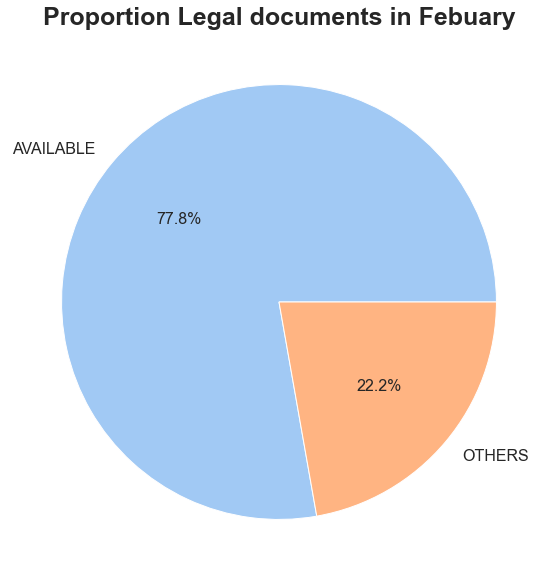

In [275]:
highPriceMonth['Legal_documents'].value_counts().plot.pie(legend=False, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 16})
plt.ylabel('')
plt.title('Proportion Legal documents in Febuary', fontsize=25, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [15, 10]

## OBSERVATION:
- The percentage of plots having the available legal document is over tripple the other and there is no waiting legal document
> It seems to be more safer and the Legal document is one of the influences for the price in the Febuary is more high.

### Proportion Number of floor in Febuary

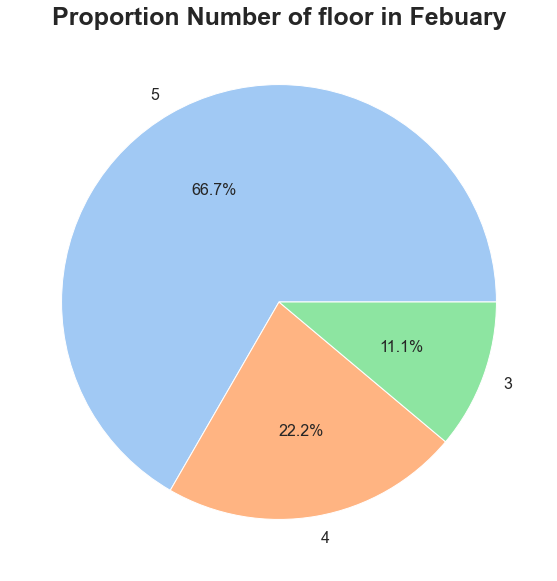

In [276]:
highPriceMonth['No_floor'].value_counts().plot.pie(legend=False, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 16})
plt.ylabel('')
plt.title('Proportion Number of floor in Febuary', fontsize=25, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [15, 10]

## OBSERVATION:
- The percentage of plots having the number of floor which is higher than 4 is higher than 11 times of the number of floor lower than 4.
> It seems to be more optimised and the number of floor is one of the influences for the price in the Febuary is more high.

### Proportion Number of bedroom in Febuary

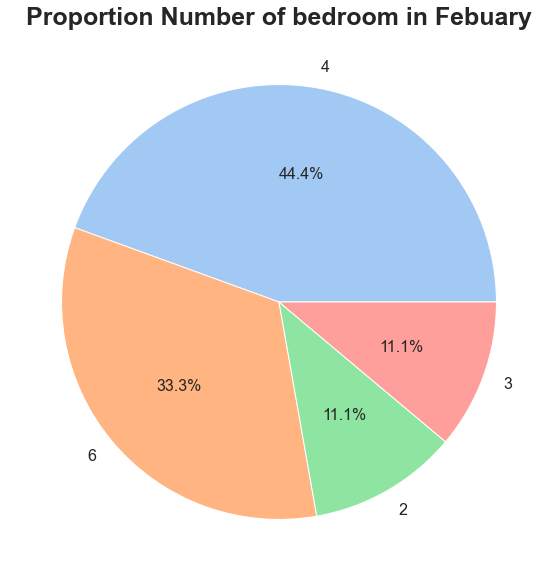

In [277]:
highPriceMonth['No_bedroom'].value_counts().plot.pie(legend=False, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 16})
plt.ylabel('')
plt.title('Proportion Number of bedroom in Febuary', fontsize=25, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [15, 10]

## OBSERVATION:
- The percentage of plots having the number of bedrooms which is higher than 4 is higher than doubke of the number of bedrooms lower than 4.
> It seems to be more optimised and the number of bedrooms is one of the influences for the price in the Febuary is more high.

### Proportion House Type in Febuary

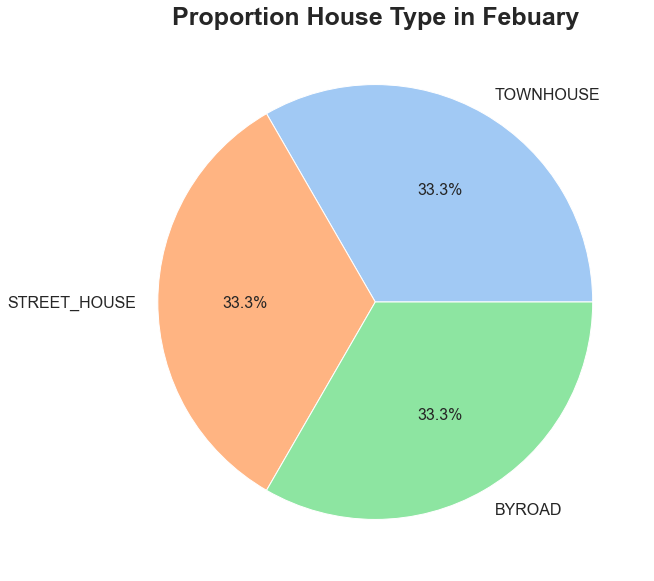

In [278]:
highPriceMonth['House_type'].value_counts().plot.pie(legend=False, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 16})
plt.ylabel('')
plt.title('Proportion House Type in Febuary', fontsize=25, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [15, 10]

## OBSERVATION:
- The highest proportion house type in Febuary is the Street_house which is more than 44 percent, the town house is the second common option. The byroad and the villa is the least common option with just over 20 percent in total.

### Price of each housing  types having different type of legal document

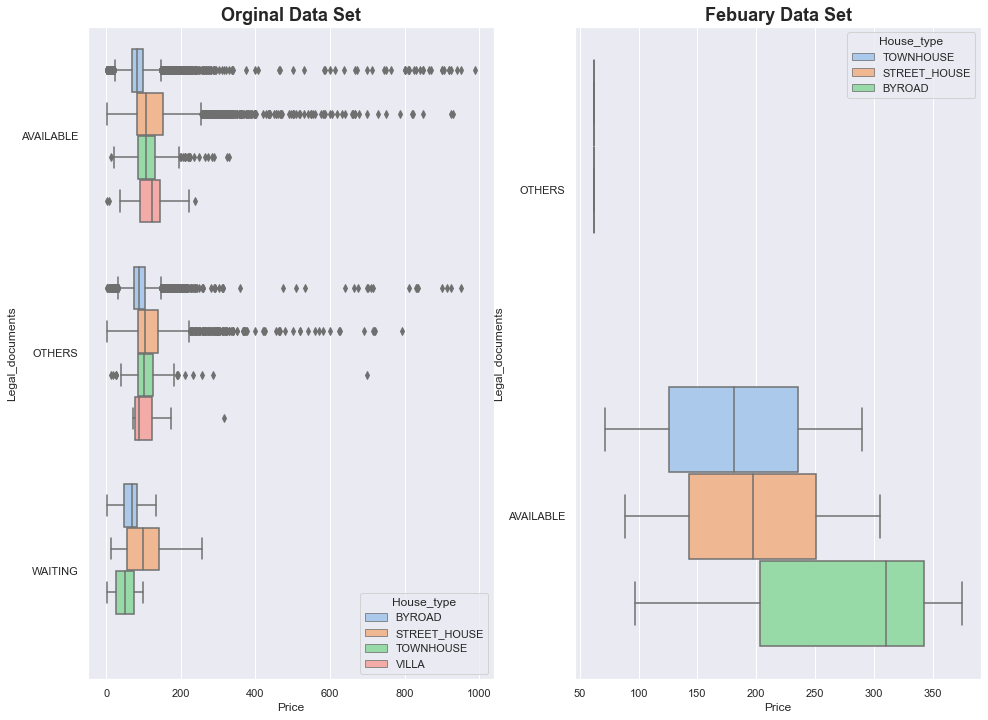

In [279]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Price", y="Legal_documents", hue="House_type", data=df, ax = ax[0]);
ax2 = sns.boxplot(x="Price", y="Legal_documents", hue="House_type", data=highPriceMonth, ax = ax[1]);
ax1.set_title("Orginal Data Set", fontsize = 18, fontweight = 'bold')
ax2.set_title('Febuary Data Set',  fontsize = 18, fontweight = 'bold')

fig.show()

### The Price of each plot in each type of legal documents with different housing types in Febuary

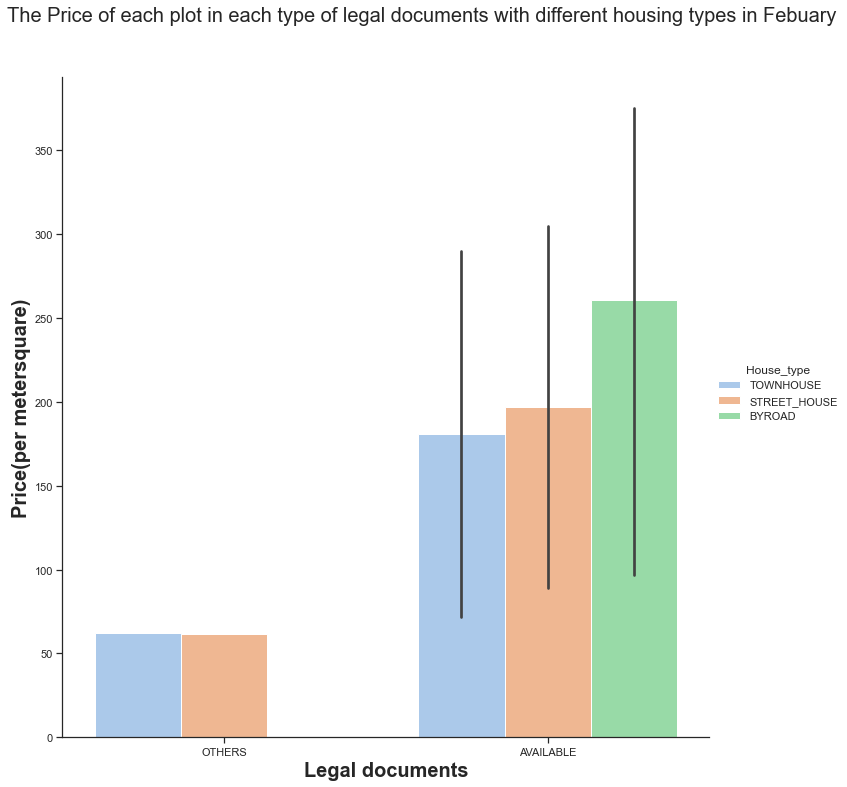

In [280]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=highPriceMonth, kind="bar", x="Legal_documents", y="Price", hue="House_type", height = 10)
plot.fig.suptitle("The Price of each plot in each type of legal documents with different housing types in Febuary", fontsize=20,
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Legal documents", fontsize = 20, fontweight = 'bold')
plot.set_ylabels("Price(per metersquare)", fontsize = 20, fontweight = 'bold')

***Summary***
***
The price in Febuary is the highest based on the fact that they have a high number of area, length, width, floors and available docmunents.

> - The highest price is in Feburary, and its price is twice of the September, whose price is the lowest
> - The plot have high price have:
> >  - Available Legal Documents
> >  - Number of room more than 3 rooms
> >  - Number of floor more than 3 floors.
> The percentage of plots having the available legal document is over tripple the other and there is no waiting legal document.
> The percentage of plots having the number of floor which is higher than 4 is higher than 11 times of the number of floor lower than 4.
> The percentage of plots having the number of room which is higher than 4 is higher than double of the number of room lower than 4.
***
> The Area, Length, Width and Floors is the factor that influences on the Price.
> The highest proportion house type in Febuary is the Street_house which is more than 44 percent, the town house is the second common option. The byroad and the villa is the least common option with just over 20 percent in total.

***
***Next Target***
- Determine the most optimised location

## Location (urban, suburban, and district) best to buy plots.

### Distribution (Proportion) of Urban and Suburban

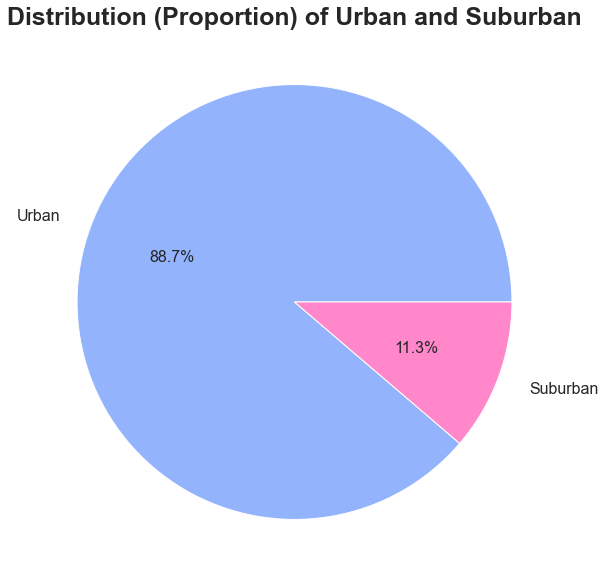

In [281]:
# Pie chart
labels = ['Urban', 'Suburban']
#colors
colors = ['#94B3FD', '#FF87CA']
ax = plt.pie(df['isUrban'].value_counts(), labels=labels, labeldistance=1.15, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16});
plt.title('Distribution (Proportion) of Urban and Suburban', fontsize=25, fontweight = 'bold')

plt.show()

### Housing Price in Urban and Suburban

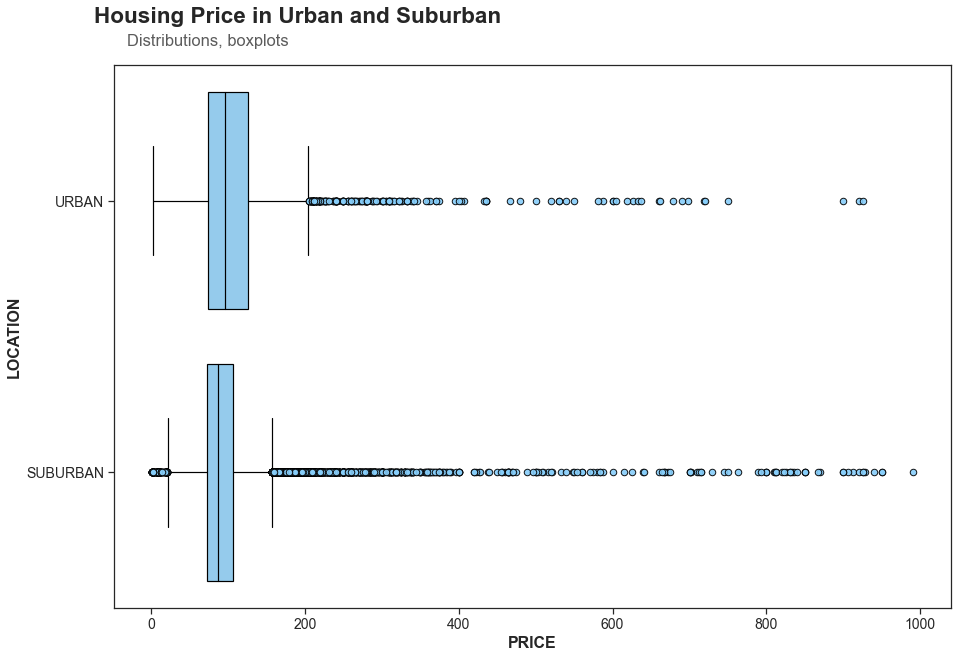

In [282]:
plot_box(df, x = "Price", y = "isUrban", xlabel = 'PRICE', ylabel = "LOCATION", title = "Housing Price in Urban and Suburban",
         subtitle = "Distributions, boxplots", color = "lightskyblue", title_position = 0.22, subtitle_position = 0.112)

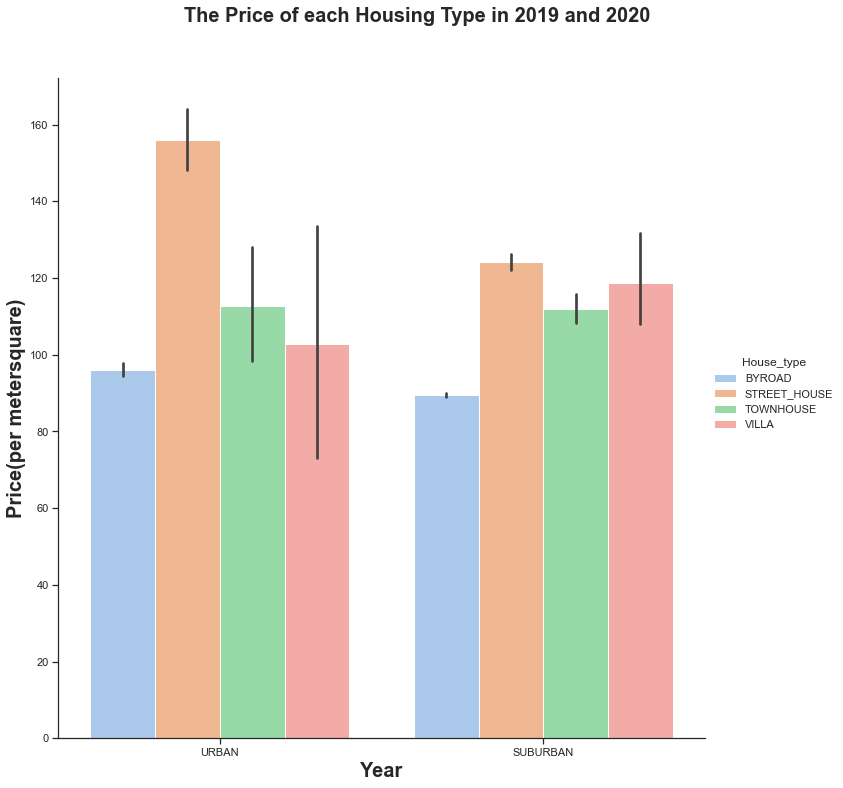

In [283]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=df, kind="bar", x="isUrban", y="Price", hue="House_type", height = 10)
plot.fig.suptitle("The Price of each Housing Type in 2019 and 2020", fontsize=20,
                  fontdict={"weight": "bold"}, y=1.08, fontweight = 'bold')
plot.set_xlabels("Year", fontsize = 20, fontweight = 'bold')
plot.set_ylabels("Price(per metersquare)", fontsize = 20, fontweight = 'bold')

***Summary***
***
- The Urban is the popular choice, it account for over 88 percent while the Suburban is less common with lower than 12 percent.
- In general, the house in Urban have the higher price, meanwhile, the price of houses in Suburban is noticably lower.
***
## Why the there is the difference in price:
***
### Select urban dataset

In [284]:
options = ['URBAN'] #Select urban

#Select urban from the ogrinal dataset:
urban = df[(df['isUrban'].isin(options))]

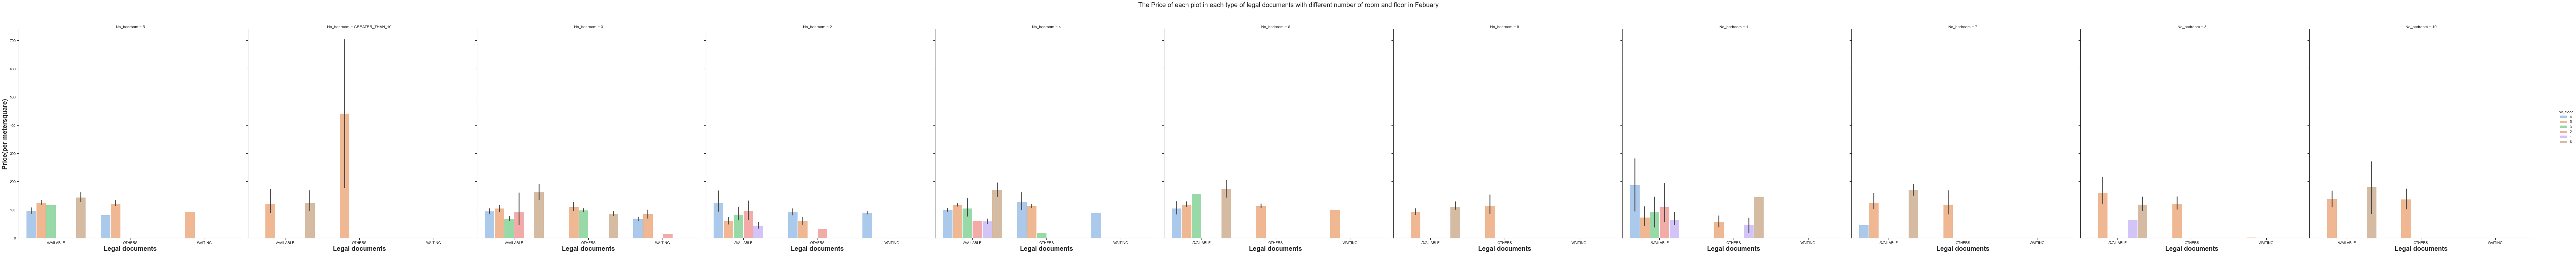

In [285]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=urban, kind="bar", x="Legal_documents", y="Price", hue="No_floor", col = "No_bedroom", height = 10)
plot.fig.suptitle("The Price of each plot in each type of legal documents with different number of room and floor in Febuary", fontsize=20,
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Legal documents", fontsize = 20, fontweight = 'bold')
plot.set_ylabels("Price(per metersquare)", fontsize = 20, fontweight = 'bold')

### Distribution (Proportion) of legal documentation in Urban

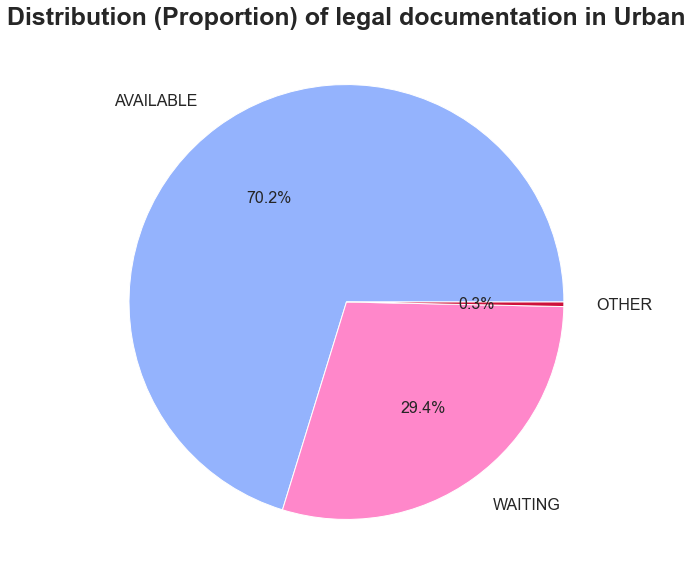

In [286]:
# Pie chart
labels = ['AVAILABLE', 'WAITING', 'OTHER']
#colors
colors = ['#94B3FD', '#FF87CA', '#CD113B']
ax = plt.pie(df['Legal_documents'].value_counts(), labels=labels, labeldistance=1.15, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16});
plt.title('Distribution (Proportion) of legal documentation in Urban', fontsize=25, fontweight = 'bold')

plt.show()

### Proportion Number of floor in Urban

In [287]:
# the under 18 years old should not have more than 5 years code
options = ['AVAILABLE']
floor = ['GREATER_THAN_10', '9', '10']

# selecting rows based on condition the number of 'YearsCode' is larger than 5
#reconfirm the condition again
safe = df[(df['Legal_documents'].isin(options)) & (df['Area'] > 30) & (~df['No_floor'].isin(floor)) &
             (df['Price'] >= 495.000)]
# rslt_df = df[(df['Price'] > 495.000)]
safe

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year,Street,isUrban,isSafe
1745,NAM TỪ LIÊM,MỸ ĐÌNH 1,BYROAD,AVAILABLE,5,6,40.0,10.0,4.0,800.0,TUESDAY,8,2020,LÊ ĐỨC THỌ,SUBURBAN,False
1843,ĐỐNG ĐA,KIM LIÊN,BYROAD,AVAILABLE,5,6,40.0,10.0,4.0,812.5,TUESDAY,8,2020,LÊ DUẨN,SUBURBAN,False
4301,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,5,6,50.0,12.0,4.5,920.0,MONDAY,8,2020,27,URBAN,False
4386,BA ĐÌNH,ĐIỆN BIÊN,STREET_HOUSE,AVAILABLE,4,3,31.0,10.0,3.0,516.13,MONDAY,8,2020,ĐIỆN BIÊN PHỦ,SUBURBAN,False
10474,ĐỐNG ĐA,HÀNG BỘT,BYROAD,AVAILABLE,3,3,45.0,11.0,5.0,811.11,THURSDAY,7,2020,THÔNG PHONG||445,SUBURBAN,False
11807,HOÀN KIẾM,HÀNG BỒ,STREET_HOUSE,AVAILABLE,5,8,48.0,12.0,4.0,697.92,WEDNESDAY,7,2020,HÀNG PHÈN,URBAN,False
13328,BA ĐÌNH,TRÚC BẠCH,STREET_HOUSE,AVAILABLE,5,6,47.0,11.0,3.6,548.94,TUESDAY,7,2020,TRÚC BẠCH,SUBURBAN,False
14503,LONG BIÊN,BỒ ĐỀ,STREET_HOUSE,AVAILABLE,5,4,42.0,10.0,4.2,928.57,TUESDAY,7,2020,266,SUBURBAN,False
15373,HOÀNG MAI,ĐỊNH CÔNG,BYROAD,AVAILABLE,5,2,40.0,9.0,4.5,745.0,MONDAY,7,2020,ĐỊNH CÔNG,SUBURBAN,False
17719,THANH XUÂN,KIM GIANG,STREET_HOUSE,AVAILABLE,5,4,45.0,12.0,4.0,788.89,SATURDAY,7,2020,9,SUBURBAN,False


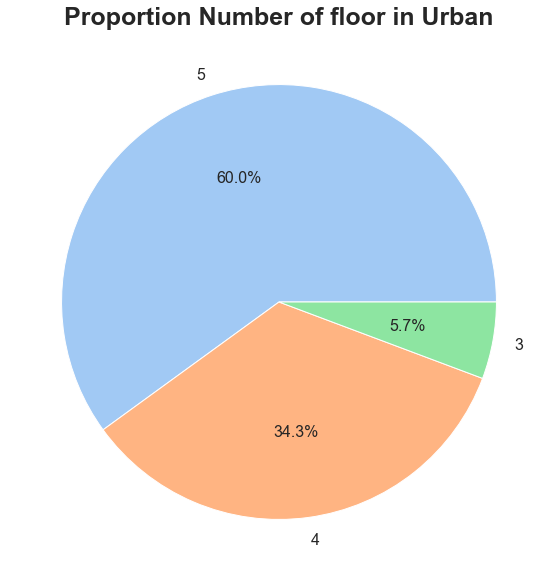

In [288]:
safe['No_floor'].value_counts().plot.pie(legend=False, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 16})
plt.ylabel('')
plt.title('Proportion Number of floor in Urban', fontsize=25, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [15, 10]

### Proportion Number of bedroom in Urban

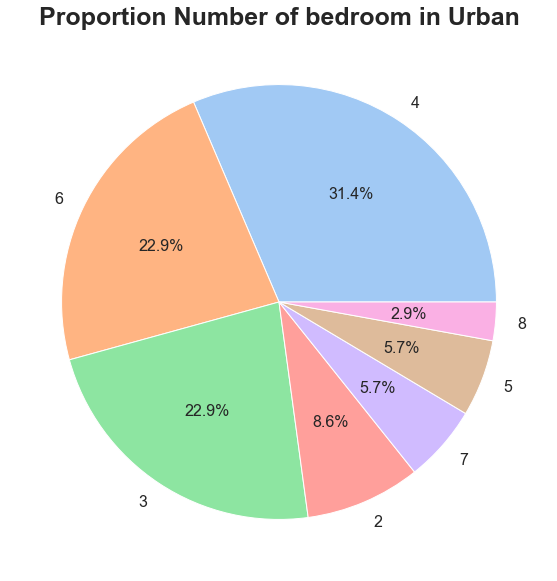

In [289]:
safe['No_bedroom'].value_counts().plot.pie(legend=False, \
                                      autopct='%1.1f%%', startangle=0, textprops={'fontsize': 16})
plt.ylabel('')
plt.title('Proportion Number of bedroom in Urban', fontsize=25, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [15, 10]

In [290]:
urban.describe()

,Area,Length,Width,Price,Month,Year
count,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000
mean,42.296717,24.153322,9.635634,108.841836,6.725506,2019.998161
std,6.463122,382.812619,127.318676,70.309316,0.625722,0.042846
min,1.000000,1.000000,2.000000,2.000000,2.000000,2019.000000
25%,40.000000,10.000000,4.000000,73.750000,6.000000,2020.000000
50%,43.000000,10.000000,4.000000,95.920000,7.000000,2020.000000
75%,47.000000,11.000000,4.000000,126.090000,7.000000,2020.000000
max,50.100000,14000.000000,3700.000000,925.000000,11.000000,2020.000000


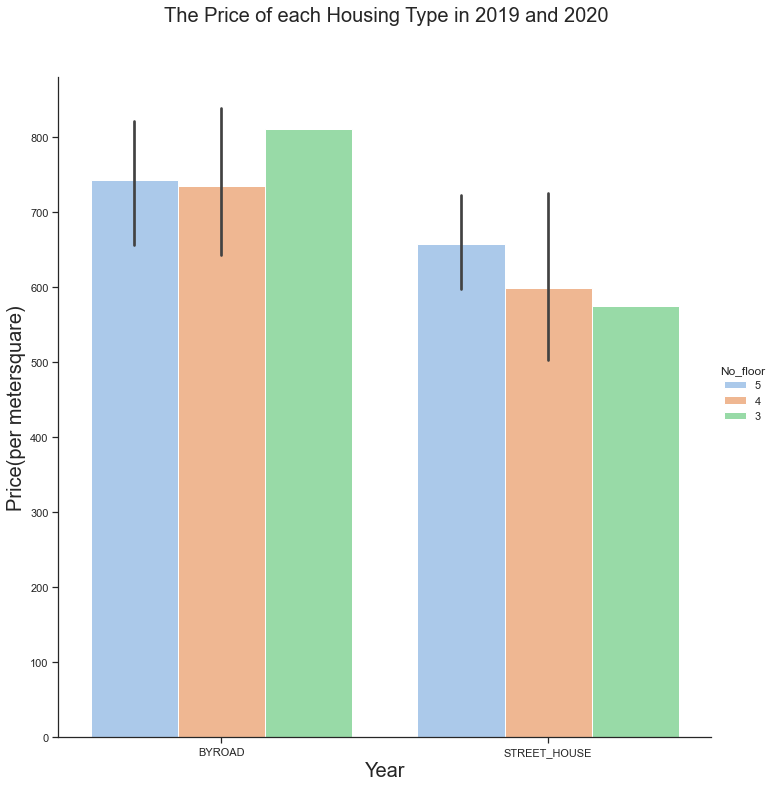

In [291]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=safe, kind="bar", x="House_type", y="Price", hue="No_floor", height = 10)
plot.fig.suptitle("The Price of each Housing Type in 2019 and 2020", fontsize=20,
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Year", fontsize = 20)
plot.set_ylabels("Price(per metersquare)", fontsize = 20)

In [292]:
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
def plot_box(x, y, xlabel, ylabel, title, subtitle, color, title_position, subtitle_position, order=None):
    ax = sns.boxplot(data = df, y = y, x = x, order = order,
                 linewidth = 1.2, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9))

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)
    ax.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = ax.transAxes)
    plt.show()

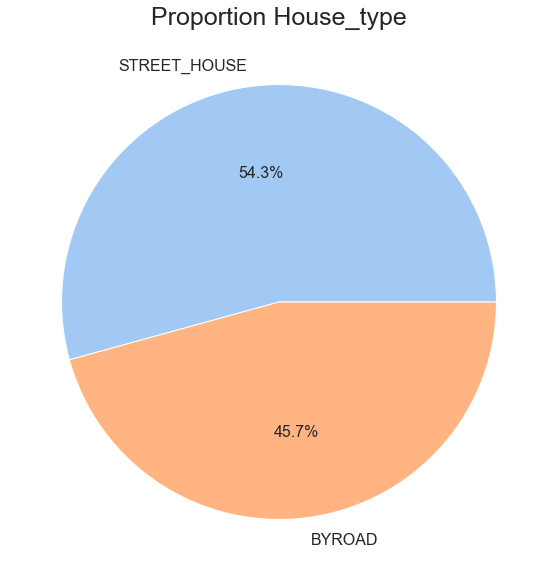

In [293]:
safe['House_type'].value_counts().plot.pie(legend=False, \
                                      autopct='%1.1f%%', startangle=0, textprops={'fontsize': 16})
plt.ylabel('')
plt.title('Proportion House_type', fontsize=25)
plt.rcParams['figure.figsize'] = [15, 10]

### Summary
***
- Overall, The price house in 2020 has show an downward trend from 2019 to 2020.
- The Street house has the higest price while the Byroad house has the lowest price.
- The Byroad is a popular choice
- In a year, the Febuary has the higest price out of 12 months. And now, the next target is to determine the best location for buying a plot.

### The Housing Type Price in Urban and Suburban from 2019 to 2020

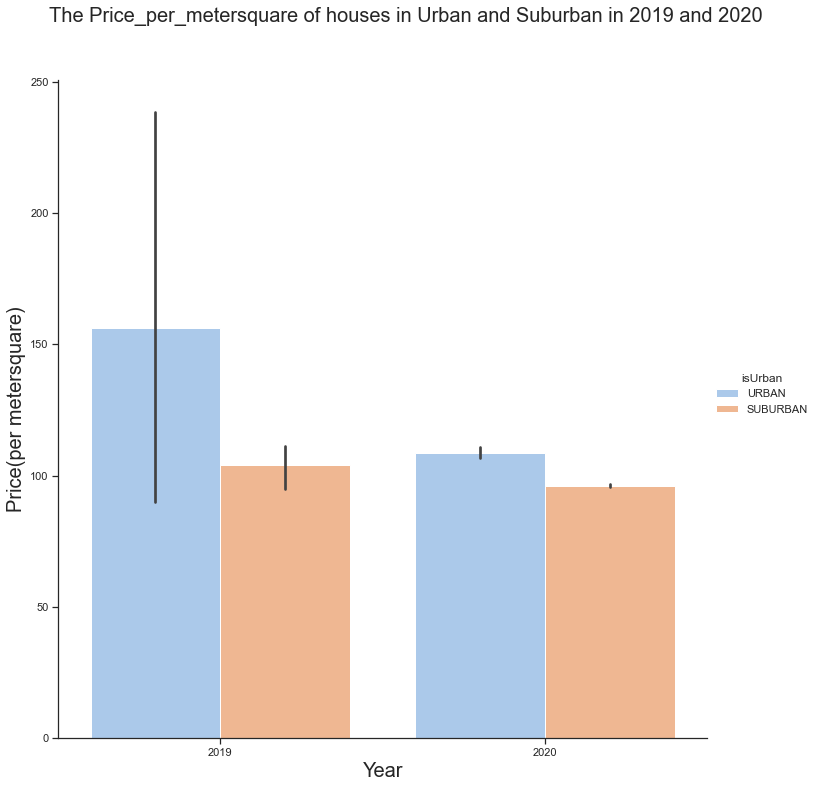

In [294]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=df, kind="bar", x="Year", y="Price", hue="isUrban", height = 10)
plot.fig.suptitle("The Price_per_metersquare of houses in Urban and Suburban in 2019 and 2020", fontsize=20,
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Year", fontsize = 20)
plot.set_ylabels("Price(per metersquare)", fontsize = 20)

price in Suburban is higher than the urban???

### The Price_per_metersquare of houses in Urban and Suburban in 2019 and 2020

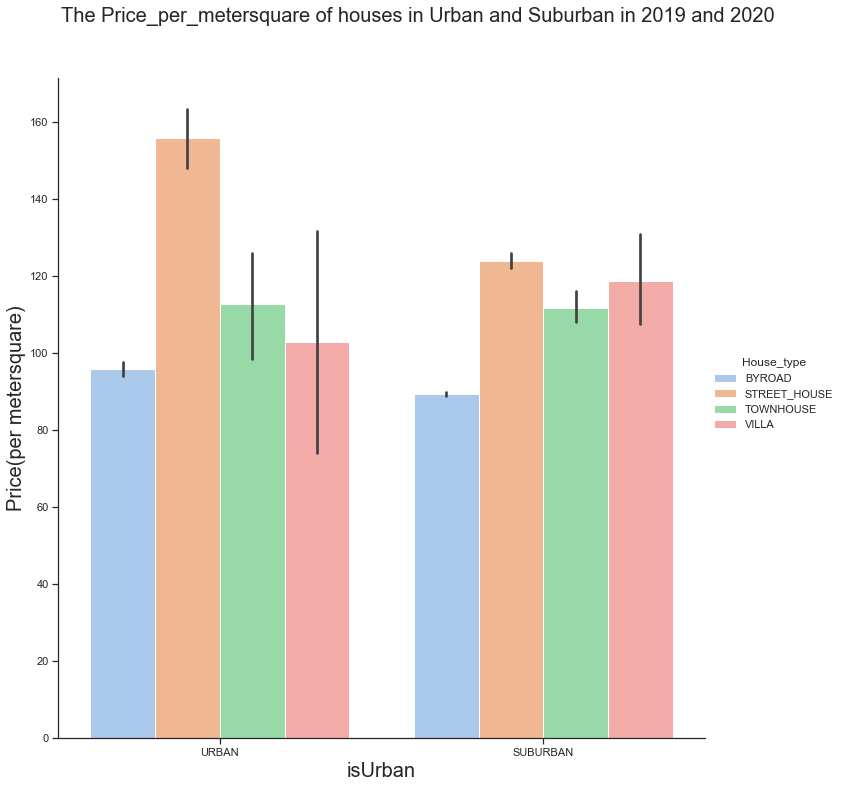

In [295]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=df, kind="bar", x="isUrban", y="Price", hue="House_type", height = 10)
plot.fig.suptitle("The Price_per_metersquare of houses in Urban and Suburban in 2019 and 2020", fontsize=20,
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("isUrban", fontsize = 20)
plot.set_ylabels("Price(per metersquare)", fontsize = 20)

price in Suburban is higher than the urban and the Adjacent townhouses is highest?

### The Distribution of Legal Document and in Urban and Suburban in 2019 and 2020

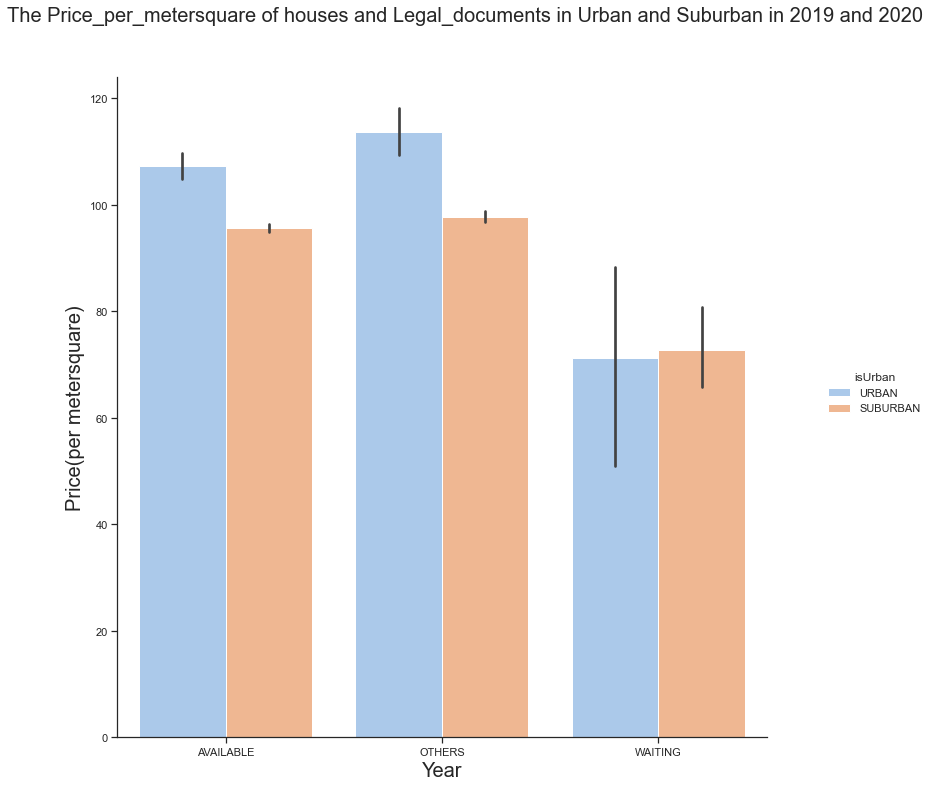

In [296]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=df, kind="bar", x="Legal_documents", y="Price", hue="isUrban", height = 10)
plot.fig.suptitle("The Price_per_metersquare of houses and Legal_documents in Urban and Suburban in 2019 and 2020", fontsize=20,
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Year", fontsize = 20)
plot.set_ylabels("Price(per metersquare)", fontsize = 20)

The plot already had registration book has higher price -> good point

### The Price_per_metersquare of each housing types in urban and suburban

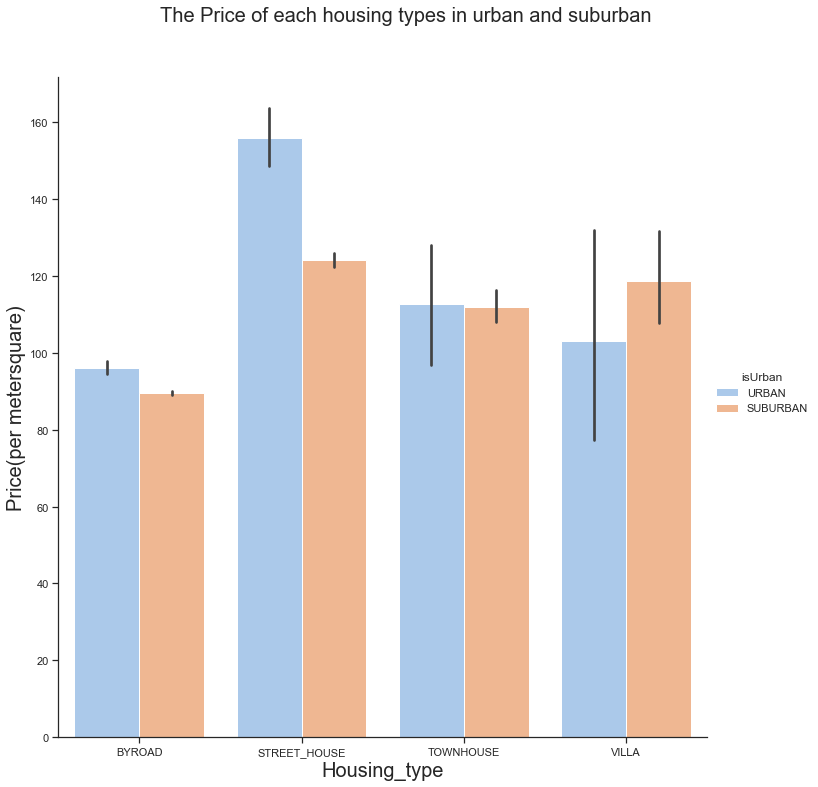

In [297]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=df, kind="bar", x="House_type", y="Price", hue="isUrban", height = 10)
plot.fig.suptitle("The Price of each housing types in urban and suburban", fontsize=20,
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Housing_type", fontsize = 20)
plot.set_ylabels("Price(per metersquare)", fontsize = 20)

### Safety factors in urban and suburban

In [298]:
# the under 18 years old should not have more than 5 years code
options = ['AVAILABLE']
floor = ['GREATER_THAN_10', '9', '10']

# selecting rows based on condition the number of 'YearsCode' is larger than 5
#reconfirm the condition again
rslt_df = df[(df['Legal_documents'].isin(options)) & (df['Area'] > 30) & (~df['No_floor'].isin(floor)) &
             (df['Price'] >= 495.000)]
# rslt_df = df[(df['Price'] > 495.000)]
rslt_df

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year,Street,isUrban,isSafe
1745,NAM TỪ LIÊM,MỸ ĐÌNH 1,BYROAD,AVAILABLE,5,6,40.0,10.0,4.0,800.0,TUESDAY,8,2020,LÊ ĐỨC THỌ,SUBURBAN,False
1843,ĐỐNG ĐA,KIM LIÊN,BYROAD,AVAILABLE,5,6,40.0,10.0,4.0,812.5,TUESDAY,8,2020,LÊ DUẨN,SUBURBAN,False
4301,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,5,6,50.0,12.0,4.5,920.0,MONDAY,8,2020,27,URBAN,False
4386,BA ĐÌNH,ĐIỆN BIÊN,STREET_HOUSE,AVAILABLE,4,3,31.0,10.0,3.0,516.13,MONDAY,8,2020,ĐIỆN BIÊN PHỦ,SUBURBAN,False
10474,ĐỐNG ĐA,HÀNG BỘT,BYROAD,AVAILABLE,3,3,45.0,11.0,5.0,811.11,THURSDAY,7,2020,THÔNG PHONG||445,SUBURBAN,False
11807,HOÀN KIẾM,HÀNG BỒ,STREET_HOUSE,AVAILABLE,5,8,48.0,12.0,4.0,697.92,WEDNESDAY,7,2020,HÀNG PHÈN,URBAN,False
13328,BA ĐÌNH,TRÚC BẠCH,STREET_HOUSE,AVAILABLE,5,6,47.0,11.0,3.6,548.94,TUESDAY,7,2020,TRÚC BẠCH,SUBURBAN,False
14503,LONG BIÊN,BỒ ĐỀ,STREET_HOUSE,AVAILABLE,5,4,42.0,10.0,4.2,928.57,TUESDAY,7,2020,266,SUBURBAN,False
15373,HOÀNG MAI,ĐỊNH CÔNG,BYROAD,AVAILABLE,5,2,40.0,9.0,4.5,745.0,MONDAY,7,2020,ĐỊNH CÔNG,SUBURBAN,False
17719,THANH XUÂN,KIM GIANG,STREET_HOUSE,AVAILABLE,5,4,45.0,12.0,4.0,788.89,SATURDAY,7,2020,9,SUBURBAN,False


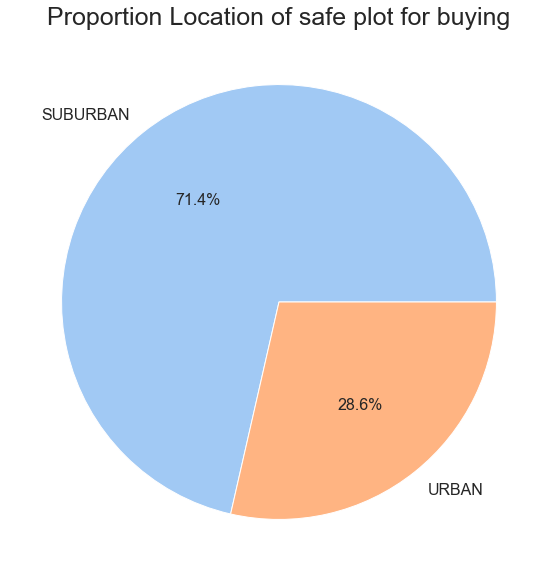

In [299]:
rslt_df['isUrban'].value_counts().plot.pie(title="Proportion Location of safe plot for buying", legend=False, \
                                      autopct='%1.1f%%', startangle=0, textprops={'fontsize': 16})
plt.ylabel('')
plt.title('Proportion Location of safe plot for buying', fontsize=25)
plt.rcParams['figure.figsize'] = [15, 10]

### Summary
The house price in suburban and urban is remarably different and the price in suburban is condierably higher, but the safety factor in urban is higher -> optimised option is buy home in urban???